https://www.kaggle.com/andrewmvd/data-scientist-jobs

1. Постановка задачи. Предлагается самостоятельно найти предметную область и обосновать применение в ней машинного обучения 
2. Разработка данных. Одно из требований к проекту - использование данных из открытых источников. Необходимо разработать процесс сбора и очистки данных 
3. Поиск алгоритма и модели для решения задачи. Необходимо выполнить подготовку данных, выбрать алгоритм и подобрать параметры для построения модели 
4. Использование модели для достижения поставленной цели 
5. Построение процесса. Решение задачи необходимо оформить в единый процесс по обработке данных от источника до предсказания, не требующий участия эксперта 
6. Обоснование процесса.

Тема: Исследование заработной платы специалистов в сфере анализа данных в США

Постановка задачи.

Целью работы является изучение заработной заработной платы специалистов по работе с данными. На основе имеющегося описания вакансии и навыков, которые требуются на определенной должности, необходимо спрогнозировать примерный уровень заработной платы специалиста. 

Кроме того, с помощью анализа имеющихся данных необходимо решить следующие задачи: 
1. Выяснить какие факторы влияют на размер заработной платы специалиста по работе с данными в США.
2. Определить освоение каких навыков специалиста по работе с данными может поднять уровень заработной платы кандидата.
3. Выяснить какие виды специалистов наиболее востребованы в данный момент. 
4. Попробовать предсказать диапазон заработной платы специалиста в сфере анализа данных.

In [1]:
import numpy as np
import pandas as pd 

# Viz
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# We'll need this for 'Job Description' and 'Job Title'
import re
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')

# N-gram counting
from sklearn.feature_extraction.text import CountVectorizer

# Shows all columns in 'head' and 'tail' functions
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 105)
pd.set_option('display.width', 100)

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Valeria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('DataScientist.csv', na_values = -1)

In [3]:
df.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007.0,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,NaN,NaN
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,NaN,NaN
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,NaN,Decode_M,"New York, NY","New York, NY",1 to 50 employees,NaN,Unknown,NaN,NaN,Unknown / Non-Applicable,NaN,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",NaN
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
Unnamed: 0           3909 non-null int64
index                3909 non-null int64
Job Title            3909 non-null object
Salary Estimate      3909 non-null object
Job Description      3909 non-null object
Rating               3500 non-null float64
Company Name         3909 non-null object
Location             3909 non-null object
Headquarters         3669 non-null object
Size                 3680 non-null object
Founded              2932 non-null float64
Type of ownership    3680 non-null object
Industry             3363 non-null object
Sector               3363 non-null object
Revenue              3680 non-null object
Competitors          1149 non-null object
Easy Apply           164 non-null object
dtypes: float64(2), int64(2), object(13)
memory usage: 519.2+ KB


In [5]:
df.describe()

,Unnamed: 0,index,Rating,Founded
count,3909.000000,3909.000000,3500.000000,2932.000000
mean,1954.000000,2167.446662,3.784143,1972.371419
std,1128.575429,1247.657849,0.614619,52.719618
min,0.000000,0.000000,1.000000,1625.000000
25%,977.000000,1121.000000,3.400000,1961.000000
50%,1954.000000,2161.000000,3.800000,1995.000000
75%,2931.000000,3249.000000,4.100000,2006.000000
max,3908.000000,4379.000000,5.000000,2020.000000


In [6]:
df.describe(include = 'O')

,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
count,3909,3909,3909,3909,3909,3669,3680,3680,3363,3363,3680,1149,164
unique,2079,148,3685,2075,191,542,8,14,95,25,13,421,1
top,Data Scientist,$93K-$151K (Glassdoor est.),The U.S. Department of the Treasury has a dist...,Apple\n4.1,"Austin, TX","New York, NY",10000+ employees,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,"Amazon, Accenture, Microsoft",True
freq,274,62,14,60,345,297,993,1933,472,1124,1163,61,164


In [7]:
# Split "Location" into State and City
df[['City', 'State']] = df.Location.str.split(', ', expand=True)  
print('How many jobs here from United Kingdom: ', df['State'][df.State == 'United Kingdom'].count())
print('Shape size before cleaning: ',df.shape)
df = df[:][df.State != 'United Kingdom'].reset_index()
print('Shape size after cleaning: ',df.shape)

How many jobs here from United Kingdom:  4
Shape size before cleaning:  (3909, 19)
Shape size after cleaning:  (3905, 20)


Text(0, 0.5, 'Number of companies')

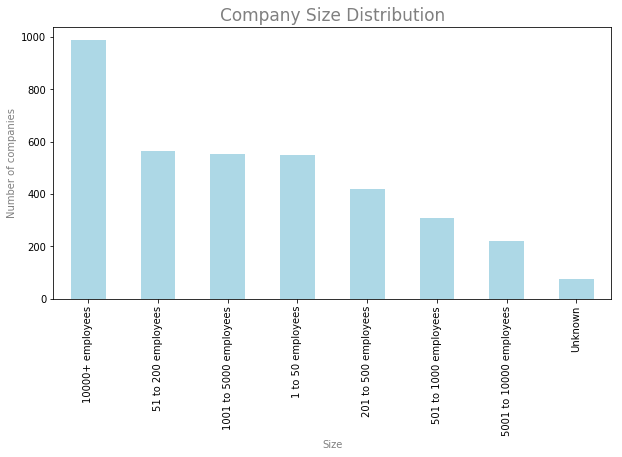

In [8]:
plt.figure(figsize=(10,5))
df.Size.value_counts().plot.bar(color = 'lightblue')
plt.title("Company Size Distribution", color = 'grey', fontsize = 17)
plt.xlabel("Size", color = 'grey')
plt.ylabel("Number of companies", color = 'grey')

Text(0, 0.5, 'Number of companies')

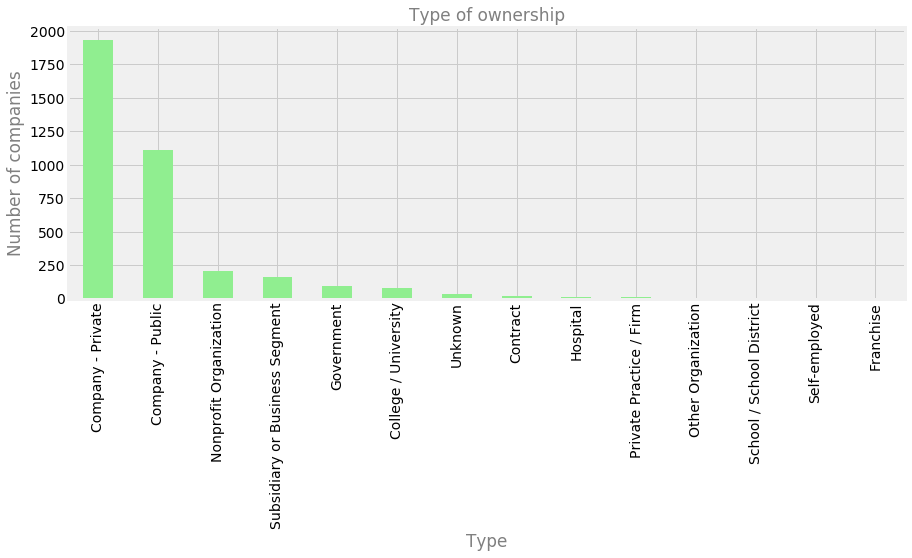

In [9]:
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')
df['Type of ownership'].value_counts().plot.bar(color = 'lightgreen')
plt.title("Type of ownership", color = 'grey', fontsize = 17)
plt.xlabel("Type", color = 'grey')
plt.ylabel("Number of companies", color = 'grey')

Text(0, 0.5, 'Number of companies')

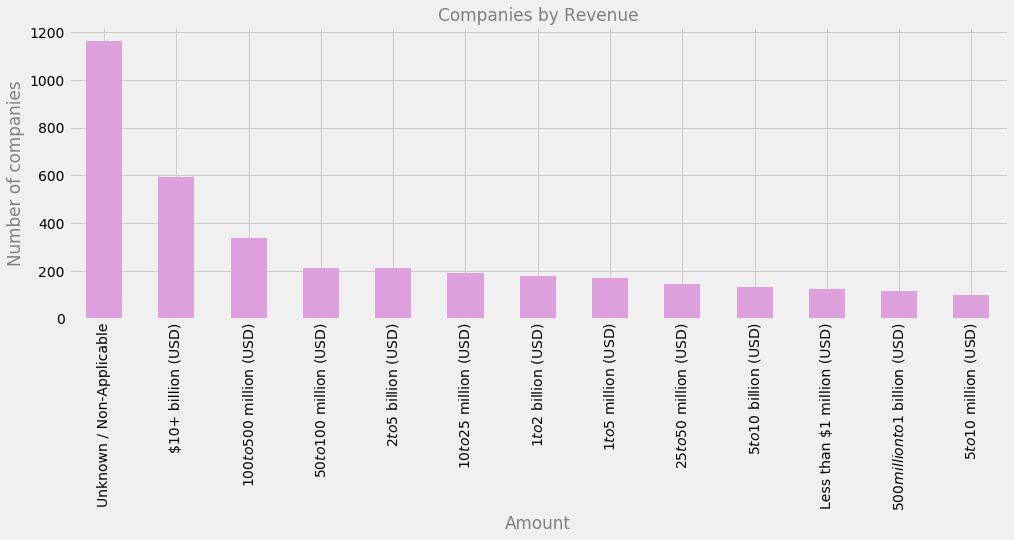

In [10]:
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')
df.Revenue.value_counts().plot.bar(color = 'plum')
plt.title("Companies by Revenue", color = 'grey', fontsize = 17)
plt.xlabel("Amount", color = 'grey')
plt.ylabel("Number of companies", color = 'grey')

Давайте создадим новую переменную, которая будет отвечать за то, находится ли вакансия в головном офисе компании. На мой взгляд все самые высокооплачиваемые вакансии большинства компаний будут находитс именно в головных офисах. 

In [11]:
print('Number of jobs in Head Offices: '
    , df[['Location', 'Headquarters']][df.Location == df.Headquarters].count()[0])

Number of jobs in Head Offices:  1215


In [12]:
# Let's create a new feature, based on this information
df['job_in_head_office'] = np.where(df.Location == df.Headquarters, 1, 0)

##### Salary range

In [13]:
hours_per_week = 40
weeks_per_year = 52

for i in range(df.shape[0]):
    salary_estimate = df.loc[i,"Salary Estimate"]
    salary_estimate = salary_estimate.replace("$", "")
    
    if "Per Hour" in salary_estimate:
        lower, upper = salary_estimate.split("-")
        upper, _ = upper.split("Per")
        upper= upper.strip()
        lower = int(lower)*hours_per_week*weeks_per_year*(1/1000)
        upper = int(upper)*hours_per_week*weeks_per_year*(1/1000)
        
    else:
        lower, upper = salary_estimate.split("-")
        lower = lower.replace("K", "")
        upper, _= upper.split("(")
        upper=upper.replace("K", "")
        upper = upper.strip()
    
        
    lower = int(lower)
    upper = int(upper)
    df.loc[i,"salary_estimate_lower_bound"] = lower
    df.loc[i,"salary_estimate_upper_bound"] = upper

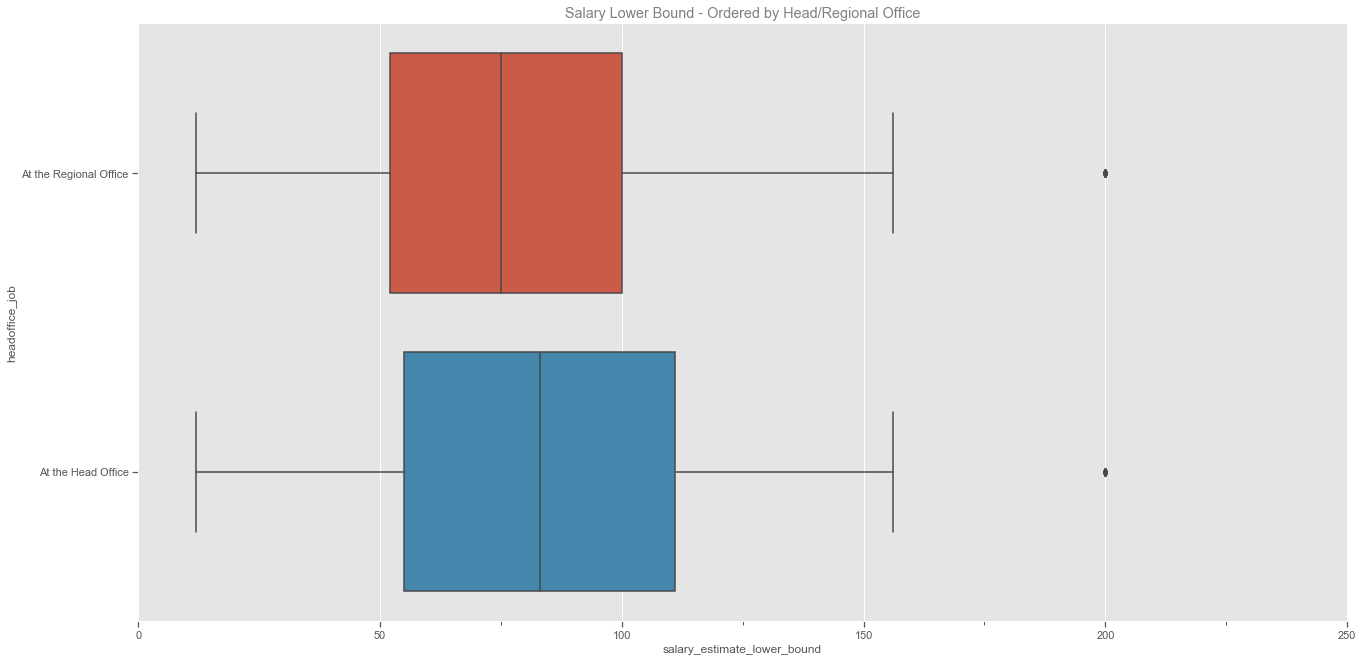

In [14]:
df['headoffice_job'] = np.where(df.job_in_head_office == 1, 'At the Head Office', 'At the Regional Office')
sns.set(style="ticks", color_codes=True)
plt.style.use('ggplot')
g = sns.catplot(x="salary_estimate_lower_bound", y="headoffice_job", kind="box", data=df, order = df.headoffice_job.value_counts().index)
g.fig.set_size_inches(30, 10)
g.set(xlim=(0, 250))
g.ax.set_xticks([50,75,100,125,150,175,200,225,250], minor=True)
plt.title("Salary Lower Bound - Ordered by Head/Regional Office", color = 'grey')
plt.show()
df.drop(['headoffice_job'], axis = 1, inplace = True)

Из этого мы можем сделать вывод, что если вы специалист в сфере данных - лучше работать в головном офисе компании. Диапазон заработных плат у них заметно выше, чем в региональных офисах.

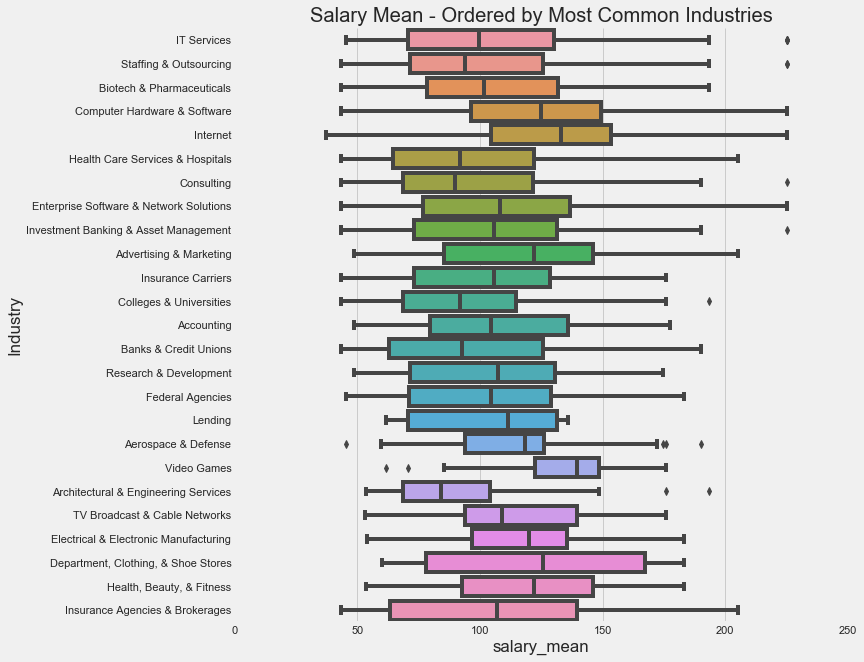

In [15]:
df['salary_mean'] = (df.salary_estimate_lower_bound +  df.salary_estimate_upper_bound)/2
sns.set(style="ticks", color_codes=True)
plt.style.use('fivethirtyeight')
g = sns.catplot(x="salary_mean", y="Industry", kind="box", data=df, order=df.Industry.value_counts().iloc[:25].index)
g.set(xlim=(0, 250))
g.fig.set_size_inches(30, 10)
g.ax.set_xticks([50,75,100,125,150,175,200,225,250], minor=True)
plt.title("Salary Mean - Ordered by Most Common Industries")
plt.show()
df.drop('salary_mean', axis = 1, inplace = True)

Основываясь на имеющихся данных, можно сказать что больше всего платят аналитикам в сфере видеоигр. Медианное значение заработной платы там выше всего, а диапазон разброса небольшой.

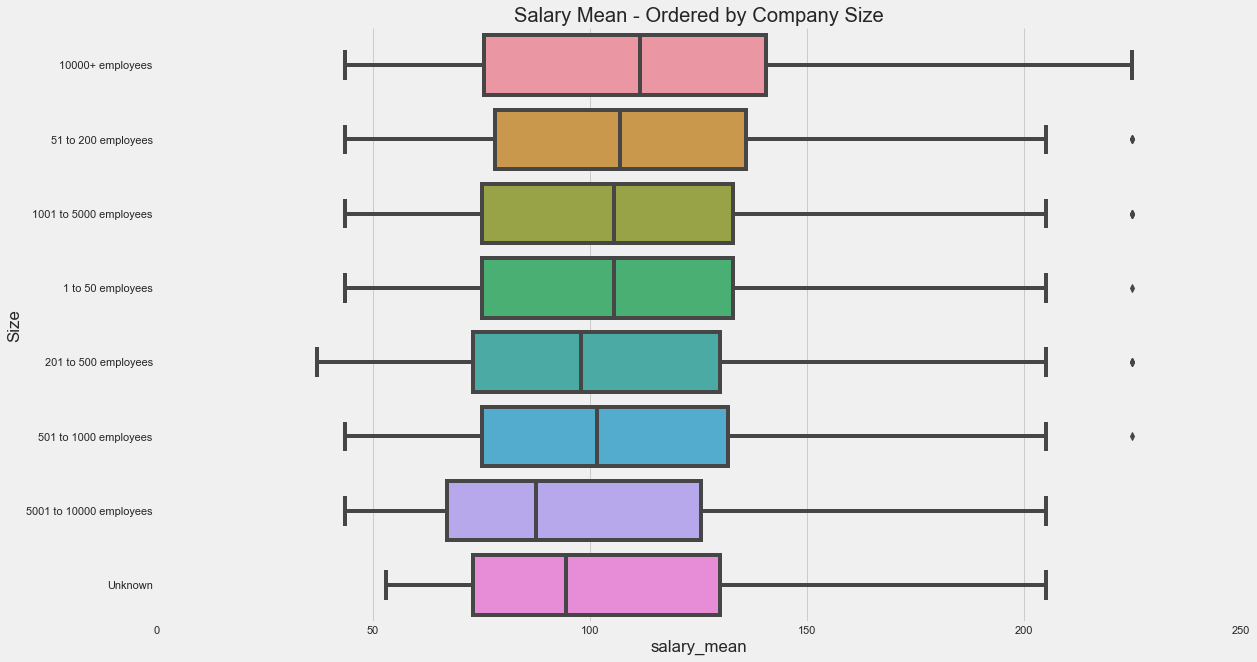

In [16]:
df['salary_mean'] = (df.salary_estimate_lower_bound +  df.salary_estimate_upper_bound)/2
sns.set(style="ticks", color_codes=True)
plt.style.use('fivethirtyeight')
g = sns.catplot(x="salary_mean", y="Size", kind="box", data=df, order=df.Size.value_counts().iloc[:25].index)
g.set(xlim=(0, 250))
g.fig.set_size_inches(30, 10)
g.ax.set_xticks([50,75,100,125,150,175,200,225,250], minor=True)
plt.title("Salary Mean - Ordered by Company Size")
plt.show()
df.drop('salary_mean', axis = 1, inplace = True)

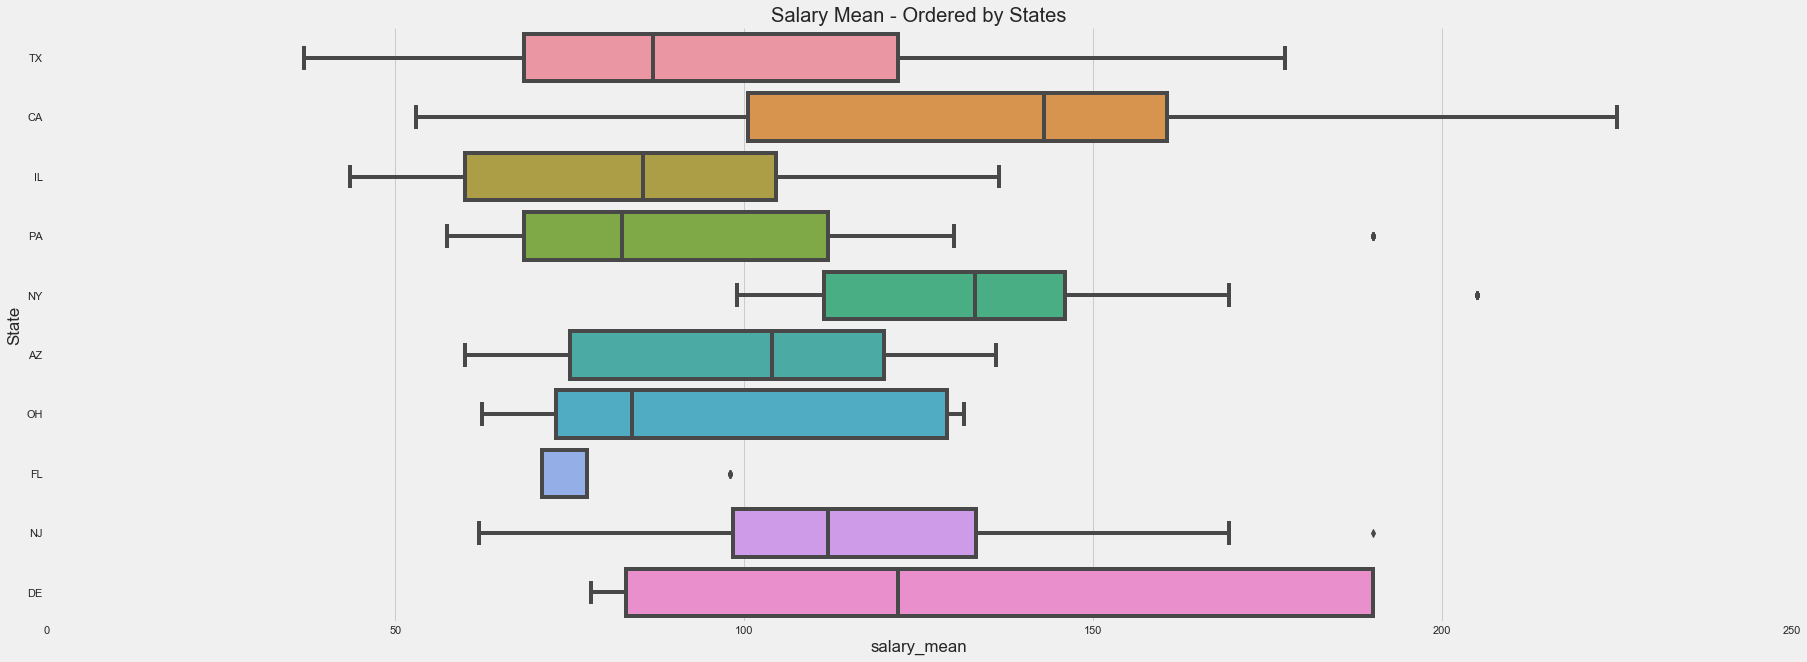

In [17]:
df['salary_mean'] = (df.salary_estimate_lower_bound +  df.salary_estimate_upper_bound)/2
sns.set(style="ticks", color_codes=True)
plt.style.use('fivethirtyeight')
g = sns.catplot(x="salary_mean", y="State", kind="box", data=df, order=df.State.value_counts().iloc[:25].index)
g.set(xlim=(0, 250))
g.fig.set_size_inches(30, 10)
g.ax.set_xticks([50,75,100,125,150,175,200,225,250], minor=True)
plt.title("Salary Mean - Ordered by States")
plt.show()
df.drop('salary_mean', axis = 1, inplace = True)

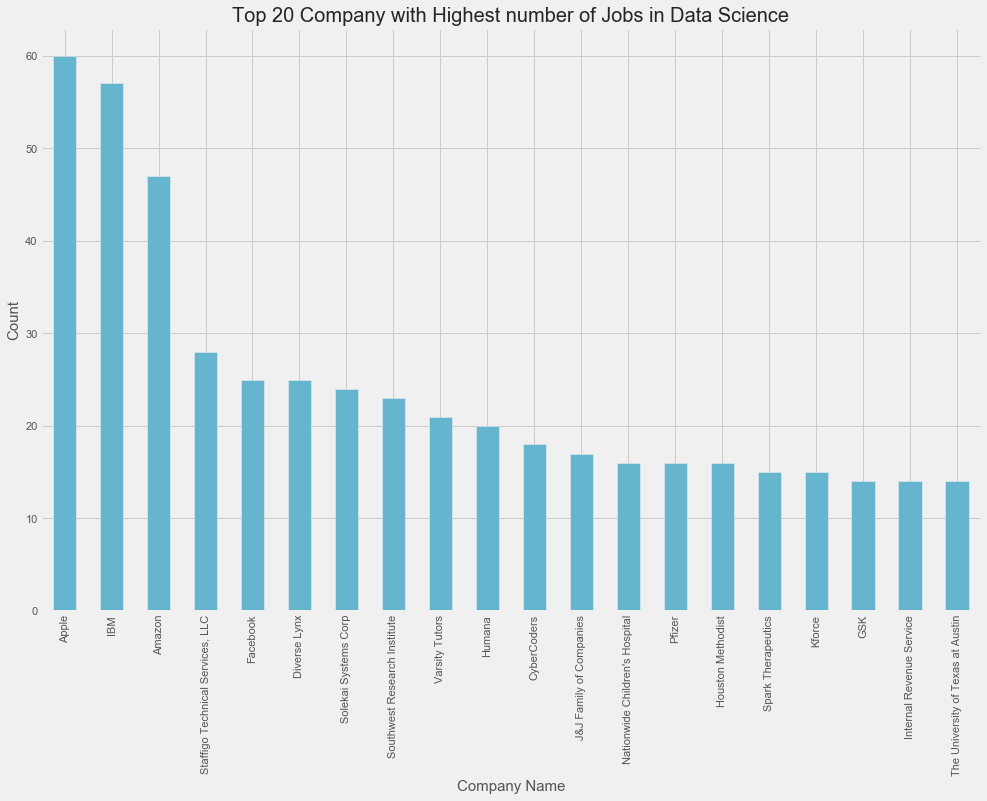

In [19]:
df['Company Name'] = df['Company Name'].str.partition('\n')[0]
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use("fivethirtyeight")
df["Company Name"].value_counts().sort_values(ascending=False).head(20).plot.bar(color='c')
plt.title("Top 20 Company with Highest number of Jobs in Data Science",fontsize=20)
plt.xlabel("Company Name",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

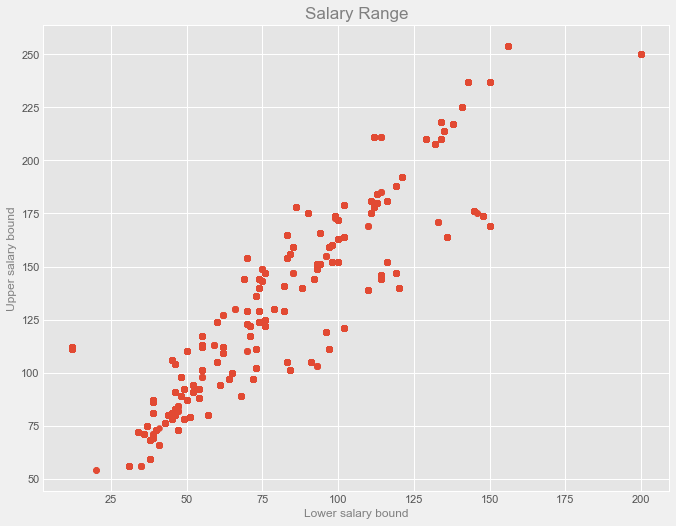

In [18]:
plt.figure(figsize=(10,8))
plt.style.use('ggplot')
plt.scatter(df['salary_estimate_lower_bound'], df['salary_estimate_upper_bound'])
plt.title("Salary Range", color = 'grey', fontsize = 17)
plt.xlabel("Lower salary bound", color = 'grey')
plt.ylabel("Upper salary bound", color = 'grey')
plt.grid(color = 'white')

Как можно догадаться из графика, обучить модель предсказывать заработную плату по подобному диапазону вряд ли получится. 
Кроме того, для некоторых значений он выглядит странно. 

Например, для крайней левой точки диапазон ~ $12,5 - 112,5 тысяч в год. Это, мягко, говоря, пальцем в небо.

Поэтому, для предсказания примерной заработной платы я создам жесткие интервалы вручную, основываясь на графике выше.

In [20]:
# df['salary'] = np.nan
# for i in range(df.shape[0]):
#     upper_bound = df['salary_estimate_upper_bound'][i]
#     if upper_bound <= 100:
#         df['salary'][i] = '50-100'
#     elif (upper_bound > 100 and upper_bound <= 150):
#         df['salary'][i] = '75-150'
#     elif (upper_bound > 150 and upper_bound <= 200):
#         df['salary'][i] = '100-200'
#     else: 
#         df['salary'][i] = '200+'  
# #Вот с этим уже можно будет работать
# df.salary.reset_index().groupby('salary').count()

In [21]:
df['salary'] = np.nan
for i in range(df.shape[0]):
    lower_bound = df['salary_estimate_lower_bound'][i]
    if lower_bound <= 60:
        df['salary'][i] = '50-100'
    elif (lower_bound > 60 and lower_bound <= 100):
        df['salary'][i] = '75-150'
    elif (lower_bound > 100 and lower_bound <= 150):
        df['salary'][i] = '100-200'
    else: 
        df['salary'][i] = '150-250'
# Вот с этим уже можно будет работать
df.salary.reset_index().groupby('salary').count()

,index
salary,
100-200,1001
150-250,59
50-100,1251
75-150,1594


Давайте обзначим список того, что мы можем сделать для дальнейшего анализа:
    - почистить Job Title и вытащить в отдельную колонку уровень кандидата;
    - привести в порядок поле Salary Estimate;
    - вытащить из поля Job Description навыки;
    - разбить Location на две отдельные колонки: город и штат;
    - заменить пропуски в оставшихся полях и преобразовать категориальные переменные.
    
Начнем с того, что посмотрим на облако слов, построенное из заголовков вакансий в сфере анализа данных.

### Job Title

In [22]:
df['Job Title'][0:10]

0                Senior Data Scientist
1    Data Scientist, Product Analytics
2                 Data Science Manager
3                         Data Analyst
4               Director, Data Science
5                       Data Scientist
6              Quantitative Researcher
7      Quantitative Research Associate
8                         AI Scientist
9              Quantitative Researcher
Name: Job Title, dtype: object

In [23]:
# You could use the CountVectorizer of the package sklearn:

word_vectorizer = CountVectorizer(stop_words = ['senior', 'sr', 'lead', 'junior', 'principal', 'head', 'science'], ngram_range=(2,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df['Job Title'])
frequencies = sum(sparse_matrix).toarray()[0]
job_title = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
job_title.sort_values('frequency', ascending = False, inplace = True)

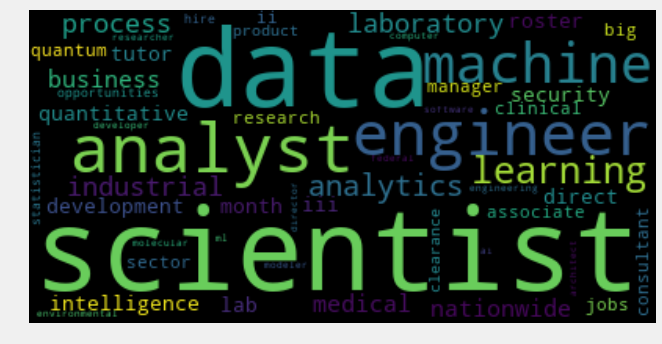

In [24]:
from wordcloud import WordCloud  

text = job_title.reset_index()[:100]
text = " ".join(review for review in text['index'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize = (15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Это лист самых популярных заголовков вакансий в сфере анализа данных. 

Чисто субъетивно, я бы объединила некоторые из наиболее часто встречаемых словосочетаний. Поэтому я немного переработаю имеющийся список, чтобы систематизировать его.

In [25]:
df['Title'] = 0
for i in range(len(df['Job Title'])):
    
    jobtitle = df['Job Title'][i].lower()
    
    if 'data scientist' in jobtitle or 'data science' in jobtitle:
        df['Title'][i] = 'data scientist' 
        
    elif 'data analyst' in jobtitle or 'data analytics' in jobtitle:
        df['Title'][i] = 'data analyst'
        
    elif 'data engineer' in jobtitle or 'engineer data' in jobtitle:
        df['Title'][i] = 'data engineer'
        
    elif 'machine learning' in jobtitle:
        df['Title'][i] = 'machine learning specialist'
        
    elif 'research scientist' in jobtitle:
        df['Title'][i] = 'research scientist'
        
    elif 'big data' in jobtitle or 'big data engineer' in jobtitle:
        df['Title'][i] = 'big data engineer'
    
    elif 'learning engineer' in jobtitle or 'machine learning engineer' in jobtitle:
        df['Title'][i] = 'machine learning engineer'
    
    elif 'business intelligence' in jobtitle or 'business intelligence analyst' in jobtitle or  'intelligence analyst' in jobtitle or 'bi analyst' in jobtitle:
        df['Title'][i] = 'bi analyst'
        
    elif 'analytics manager' in jobtitle or 'product manager' in jobtitle:
        df['Title'][i] = 'analytics manager'
    
    elif 'data modeler' in jobtitle:
        df['Title'][i] = 'data modeler'
    
    elif 'laboratory scientist' in jobtitle or 'lab scientist' in jobtitle:
        df['Title'][i] = 'lab scientist'
    
    elif 'quantitative researcher' in jobtitle or 'quantum data' in jobtitle or 'quantum data scientist' in jobtitle:
        df['Title'][i] = 'quantum data scientist'
        
    elif 'data scientist industrial' in jobtitle or 'scientist industrial' in jobtitle or 'industrial process' in jobtitle:
        df['Title'][i] = 'data scientist industrial'
        
    elif 'data architect' in jobtitle:
        df['Title'][i] = 'data architect'
        
    elif 'medical lab scientist' in jobtitle or 'medical data scientist' in jobtitle or 'medical data' in jobtitle:
         df['Title'][i] = 'medical lab scientist'
    else:
        df['Title'][i] = 'data specialist'

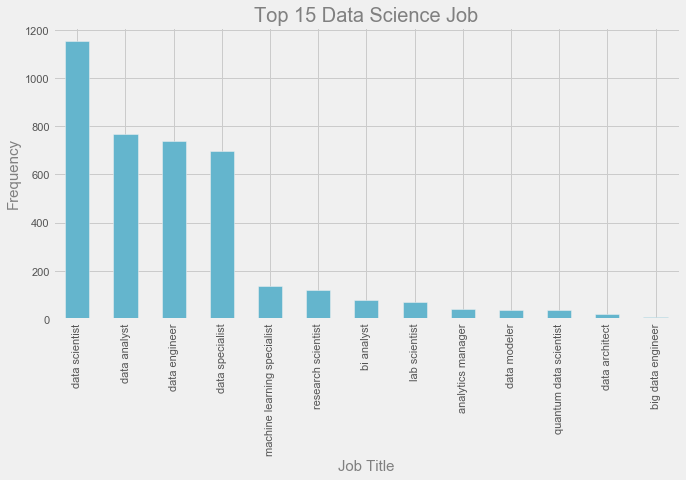

In [26]:
plt.rcParams['figure.figsize'] = (10,5)
df["Title"].value_counts().sort_values(ascending=False).head(15).plot.bar(color='c')
plt.title("Top 15 Data Science Job", fontsize=20, color = 'grey')
plt.xlabel("Job Title", fontsize=15, color = 'grey')
plt.ylabel("Frequency", fontsize=15, color = 'grey')
plt.show()

Другой разговор. Как мы видим, большинство вакансий относятся к поиску data scientist, однако также ищут и data analyst, data engineer, research scientist и bi analyst. 

Посмотрим каковы границы зарплатных диапазонов для этих специалистов.

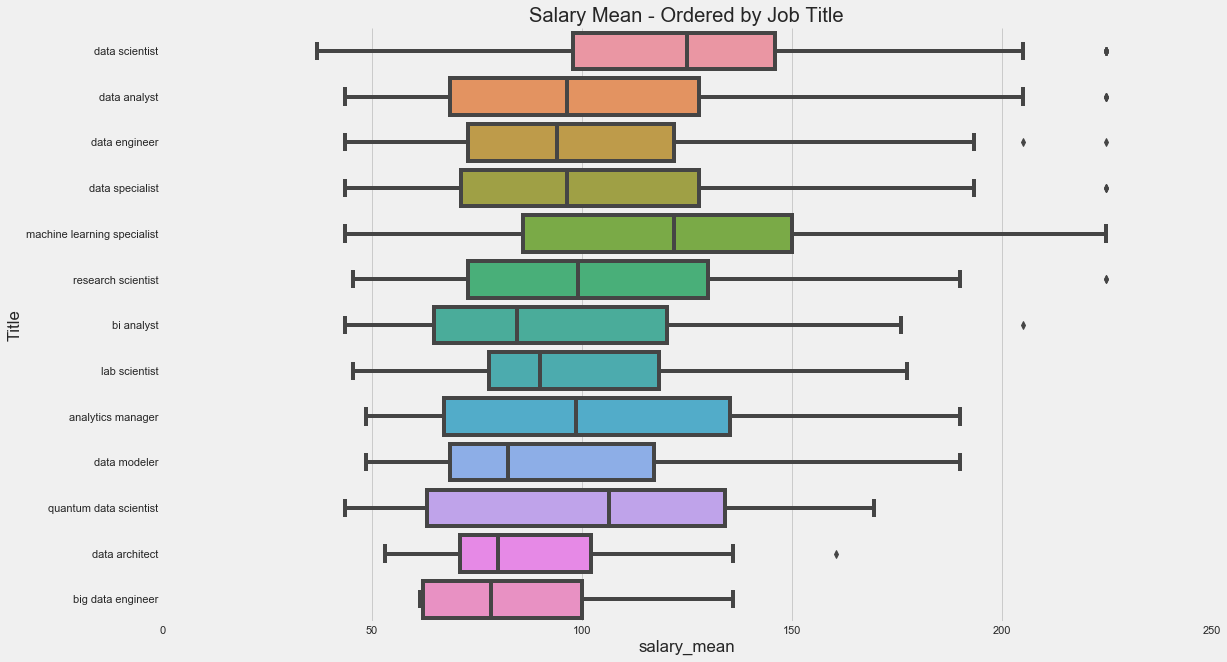

In [27]:
df['salary_mean'] = (df.salary_estimate_lower_bound +  df.salary_estimate_upper_bound)/2
sns.set(style="ticks", color_codes=True)
plt.style.use('fivethirtyeight')
g = sns.catplot(x="salary_mean", y="Title", kind="box", data=df, order=df.Title.value_counts().iloc[:25].index)
g.set(xlim=(0, 250))
g.fig.set_size_inches(30, 10)
g.ax.set_xticks([50,75,100,125,150,175,200,225,250], minor=True)
plt.title("Salary Mean - Ordered by Job Title")
plt.show()
df.drop('salary_mean', axis = 1, inplace = True)

Конечно же, data scientist самые высокооплачиваемые специалисты в сфере работы с данными.

Но это еще не все данные, которые мы можем достать из заголовка вакансии. Помимо самого профиля специалиста по работе с данными в нем часто содержится еще и его уровень. 

Мы будем брать во внимание следующие уровни, достаточно распространенные в IT среде: junior, middle (назначу по умолчанию), lead, head.

In [28]:
# Level of the specialist

junior = ['junior', 'jr', 'intern', 'internship']
senior = ['sr', 'senior']
lead = ['lead', 'teamlead', 'team lead']
director = ['director', 'principal', 'vp', 'head', 'manager']

df['job_level'] = 2
for i in range(df.shape[0]):
    for jun in junior: 
        if jun in df['Job Title'][i].lower():
            df['job_level'][i] = 1
            
    for sen in senior:
        if sen in df['Job Title'][i].lower():
            df['job_level'][i] = 3
    
    for led in lead:
        if led in df['Job Title'][i].lower():
            df['job_level'][i] = 4
            
    for direc in director:
        if direc in df['Job Title'][i].lower():
            df['job_level'][i] = 5  

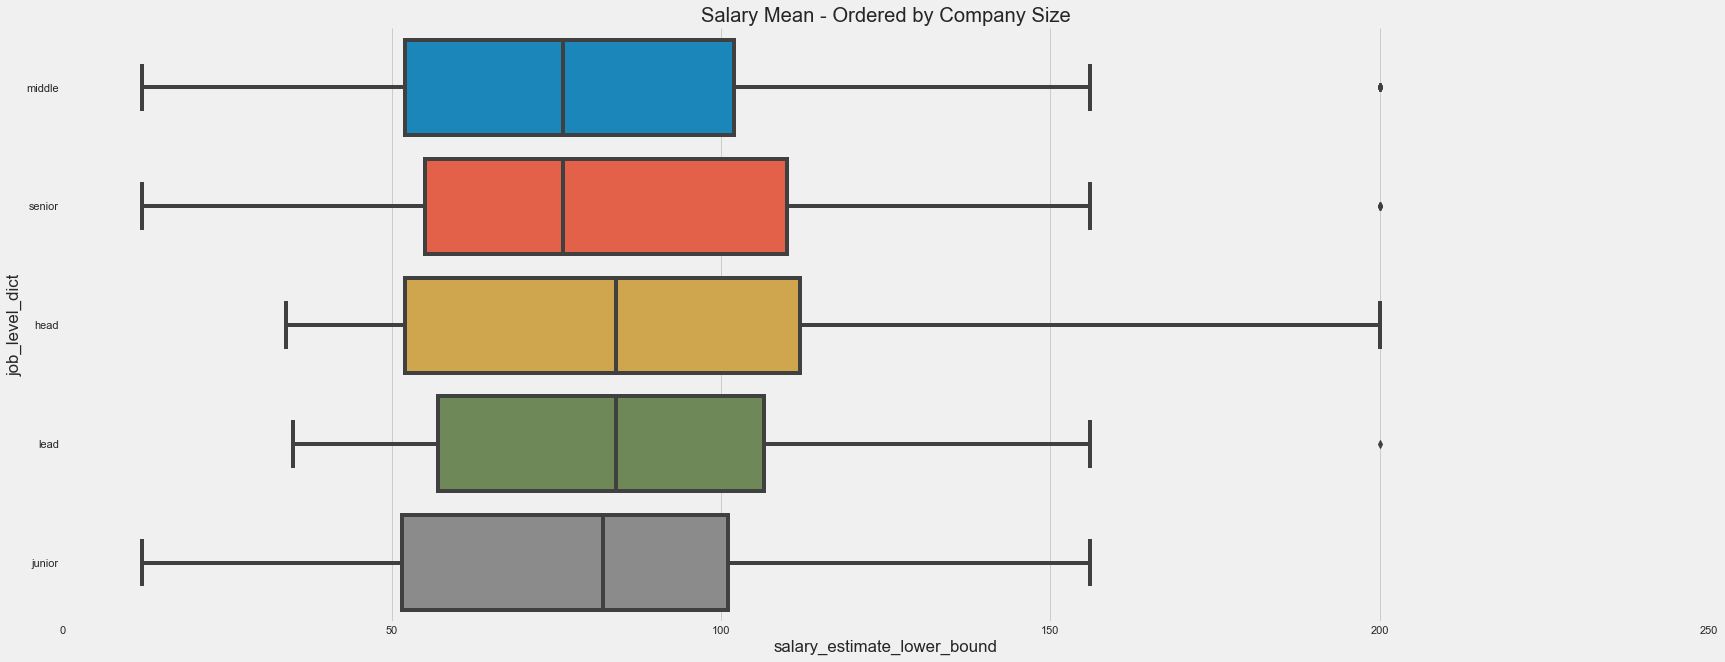

In [29]:
di = {1: 'junior', 2: 'middle', 3: 'senior', 4: 'lead', 5: 'head'}
df['job_level_dict'] = df['job_level']
df.replace({"job_level_dict": di}, inplace = True)
sns.set(style="ticks", color_codes=True)
plt.style.use('fivethirtyeight')
g = sns.catplot(x="salary_estimate_lower_bound", y="job_level_dict", kind="box", data=df, order=df.job_level_dict.value_counts().index)
g.set(xlim=(0, 250))
g.fig.set_size_inches(30, 10)
g.ax.set_xticks([50,75,100,125,150,175,200,225,250], minor=True)
#g.ax.set_xticks(['Junior', 'Middle', 'Senior', 'Lead', 'Head'])
plt.title("Salary Mean - Ordered by Company Size")
plt.show()
df.drop([ 'job_level_dict'], axis = 1, inplace = True)

In [30]:
# Does the vacancy related to science?
df['Research'] = np.where((df['Job Title'].str.lower().str.contains('research')|
                          df['Job Title'].str.lower().str.contains('doctoral')), 1, 0)

Посмотрим, увеличится ли заработная плата от того, что специалисту на должности придется заниматься научными исследоваиями.

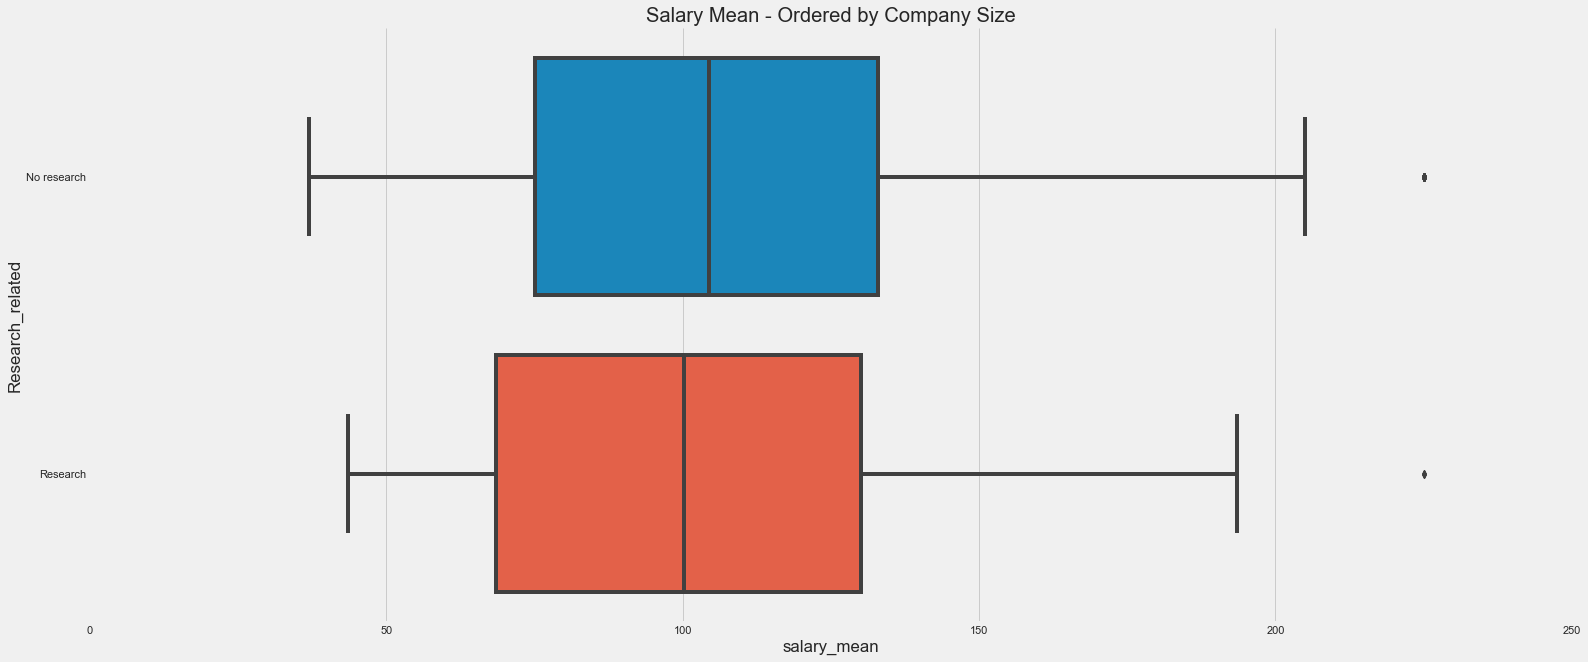

In [31]:
df['salary_mean'] = (df.salary_estimate_lower_bound +  df.salary_estimate_upper_bound)/2
df['Research_related'] = np.where(df['Research'] == 1, 'Research', 'No research')
sns.set(style="ticks", color_codes=True)
plt.style.use('fivethirtyeight')
g = sns.catplot(x="salary_mean", y="Research_related", kind="box", data=df, order=df.Research_related.value_counts().index)
g.set(xlim=(0, 250))
g.fig.set_size_inches(30, 10)
g.ax.set_xticks([50,75,100,125,150,175,200,225,250], minor=True)
#g.ax.set_xticks(['Junior', 'Middle', 'Senior', 'Lead', 'Head'])
plt.title("Salary Mean - Ordered by Company Size")
plt.show()
df.drop(['salary_mean', 'Research_related'], axis = 1, inplace = True)

Нет, в науке по-прежнему платят меньше. Однако у специалиста с Ph.D. зарплата, вероятно, будет больше, чем у специалиста с Bachelor Degree.

##### Job description
##### Extracting skills from Job Description

Как выяснилось, навыки из описания вакансии практически невозможно достать автоматически (с помощью преобразований текста), поэтому я буду использовать лист навыков, составленный вручную.

In [32]:
#Skills
skills_list = ['python', 
        'rstudio', 
        'tableau', 
        'power bi', 
        'powerbi',
        'java',
        'scala',
        'go',
        'bigquery',
        'hive',
        'javascript', 
        'c\+\+', 
        'julia', 
        'hadoop', 
        'sql', 
        'postgresql', 
        'nosql', 
        'neural networks', 
        'cnn', 
        'nlp', 
        'saas',
        'matlab',
        'pyspark',
        'tensorflow',
        'pytorch',
        'etl',
        'ms excel',
        'ms powerpoint',
        'powerpoint',
        'spark',
        'google analytics',
        'crm',
        'amazon web services',
        'sas']

In [33]:
# creating the binary variables for skills needed
for skill in skills_list:
    df[skill] = np.where(df['Job Description'].str.lower().str.contains(skill), 1, 0)

##### Extracting education from Job Description

Вытащим уровень образования из описания вакансии. Будет интересно узнать насколько сильно от него зависит заработная плата.

In [34]:
# Education
bachelor_degree = ['bs', 'bachelor']
master_degree = ['ms/ma', 'master']
phd_degree = ['phd', 'postgraduate', 'ph.d.']

# highest level of education required
df['education_bachelor'] = 0
df['education_masters'] = 0
df['education_phd'] = 0
for i in range(df.shape[0]):
    
    for bachelor in bachelor_degree: 
        if bachelor in df['Job Description'][i].lower():
            df['education_bachelor'][i] = 1
            
    for master in master_degree:
        if master in df['Job Description'][i].lower():
            df['education_masters'][i] = 1
            
    for phd in phd_degree:
        if phd in df['Job Description'][i].lower():
            df['education_phd'][i] = 1

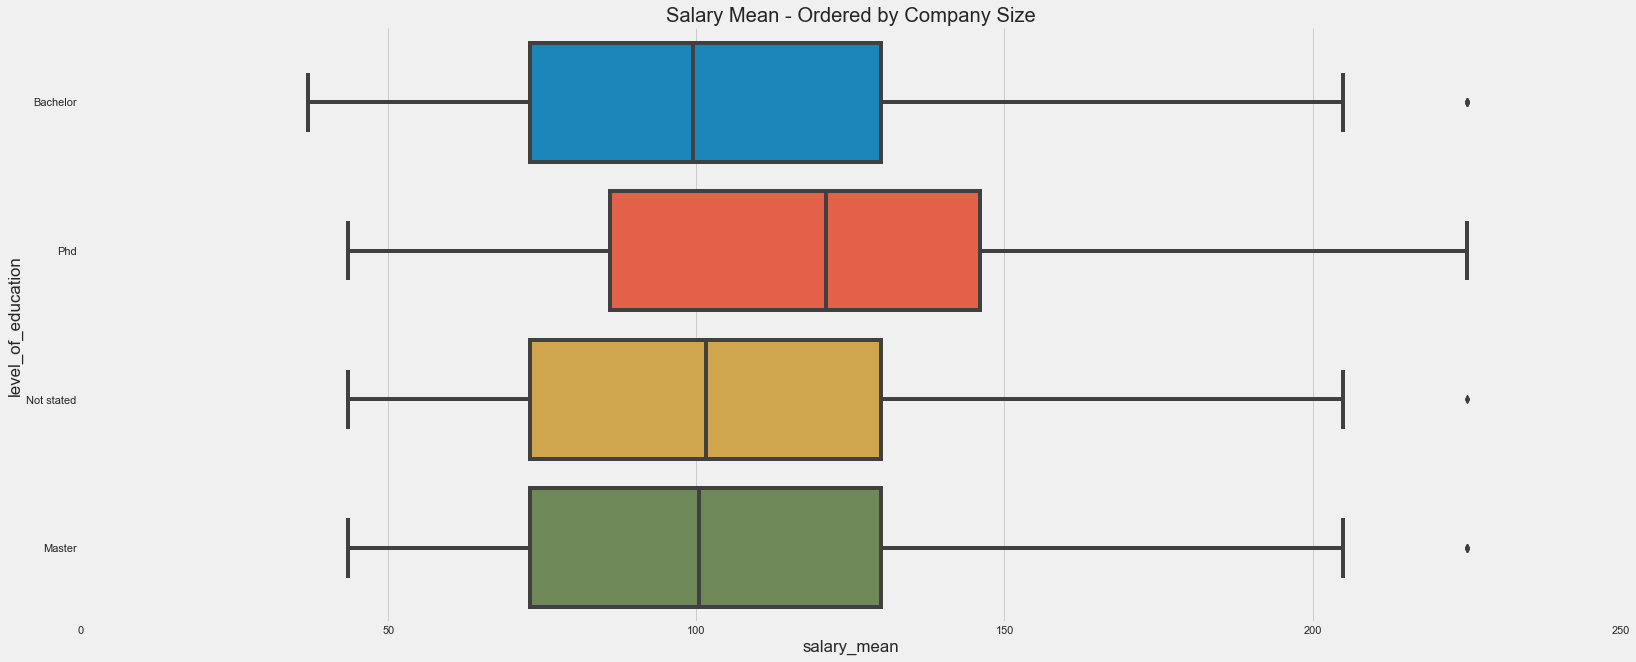

In [35]:
df['level_of_education'] = 'Not stated'
df['level_of_education'] = np.where(df['education_bachelor'] == 1, 'Bachelor', df['level_of_education'])
df['level_of_education'] = np.where(df['education_masters'] == 1, 'Master', df['level_of_education'])
df['level_of_education'] = np.where(df['education_phd'] == 1, 'Phd', df['level_of_education'])

df['salary_mean'] = (df.salary_estimate_lower_bound +  df.salary_estimate_upper_bound)/2
sns.set(style="ticks", color_codes=True)
plt.style.use('fivethirtyeight')
g = sns.catplot(x="salary_mean", y="level_of_education", kind="box", data=df, order=df.level_of_education.value_counts().index)
g.set(xlim=(0, 250))
g.fig.set_size_inches(30, 10)
g.ax.set_xticks([50,75,100,125,150,175,200,225,250], minor=True)
#g.ax.set_xticks(['Junior', 'Middle', 'Senior', 'Lead', 'Head'])
plt.title("Salary Mean - Ordered by Company Size")
plt.show()
df.drop(['salary_mean', 'level_of_education'], axis = 1, inplace = True)

##### Estracting experience from Job Description

Вытащим из описания вакансии максимальное требуемое количество лет опыта, там где это возможно.

In [36]:
rx = re.compile(r"(\d+(?:-\d+)?\+?)\s*years of experience?", re.I)
df['experience'] = 0

for i in range(df.shape[0]):
    desc = df['Job Description'][i].lower()
    desc = re.sub(r'\W', ' ', desc)
    exp_temp = rx.findall(desc)
    result = 0
    if exp_temp:
        for item in exp_temp:
            years = int(item)            
            if years <= 10:
                result = years
                break
    df['experience'][i] = result 

##### Creating "equal opportunity employers" feature from Job Description

Многие крупные компании в описании вакансии пишут, что они являются работодателем предоставляющим равные возможности для кандидатов при отборе вне зависимости от их пола, вероисповедания, расы, гражданства и т.д. 

На первый взгляд мне показалось, что компании, которые это делают - платят больше :) И вообще очень следят за своей репутацией.

In [37]:
df['equal_opportunity'] = 0

for i in range(df.shape[0]):
    equality =  df['Job Description'][i].lower()
    if ('equal opportunit' in equality) or ('equal employment opportunity' in equality):
        df['equal_opportunity'][i] = 1

(array([2415.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1490.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

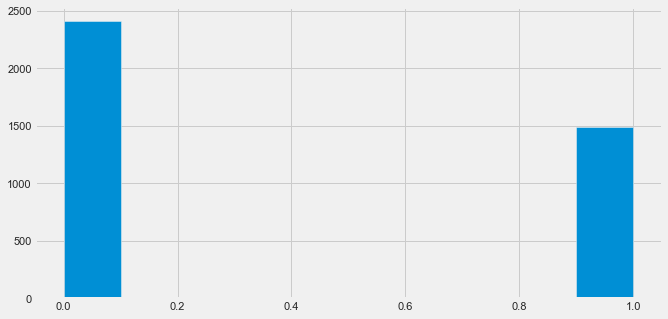

In [38]:
plt.hist(df['equal_opportunity'])

##### Which features have missing values ?

Following columns have missing values:
    - Rating; 
    - Headquarters;
    - Size;
    - Founded;
    - Type of ownership;
    - Industry;
    - Sector; 
    - Revenue;
    - Competitors;
    - Easy apply.
    
Let's try to fill in the missings or rewrite these variables in a way that is convenient for us.

##### Rating

In [39]:
df.Rating.unique()

array([3.5, 4.5, nan, 3.4, 2.9, 4.4, 5. , 4.8, 3.9, 4.3, 3. , 3.6, 3.3,
       4. , 4.1, 3.8, 3.7, 4.2, 4.6, 4.7, 3.2, 2.8, 2.7, 4.9, 2.5, 1. ,
       1.9, 3.1, 1.6, 2.6, 2.1, 2.3, 2.4, 2. , 2.2, 1.5, 1.7])

In [40]:
df['Rating'] = np.where(df.Rating < 2., 1, df['Rating'])
df['Rating'] = np.where(((df.Rating >= 2.) & (df.Rating < 3.)), 2, df['Rating'])
df['Rating'] = np.where(((df.Rating >= 3.) & (df.Rating < 4.)), 3, df['Rating'])
df['Rating'] = np.where(((df.Rating >= 4.) & (df.Rating < 4.5)), 4, df['Rating'])
df['Rating'] = np.where(df.Rating >= 4.5, 5, df['Rating'])
df['Rating'] = np.where(df.Rating.isnull() == True , df.Rating.median(), df['Rating'])

Text(0, 0.5, 'Number of companies')

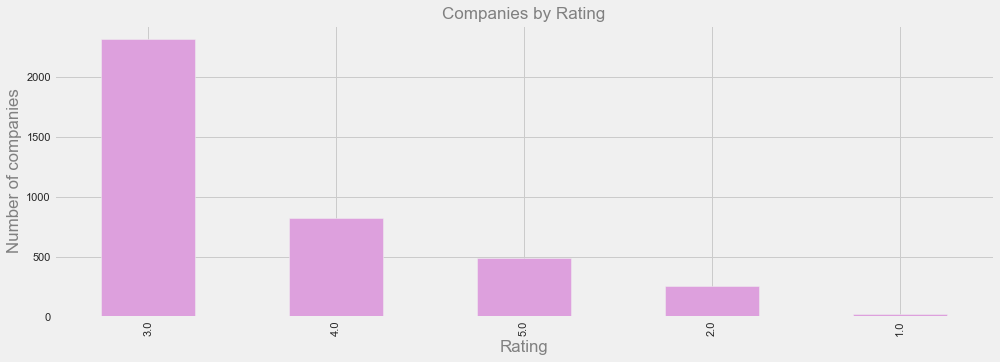

In [41]:
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')
df.Rating.value_counts().plot.bar(color = 'plum')
plt.title("Companies by Rating", color = 'grey', fontsize = 17)
plt.xlabel("Rating", color = 'grey')
plt.ylabel("Number of companies", color = 'grey')

##### Size

In [42]:
# Size column has 3676 non-missing values, so we can fill in some values
# Let's count company's size by group
df['Size'].reset_index().groupby('Size').count()   

,index
Size,
1 to 50 employees,550
10000+ employees,989
1001 to 5000 employees,553
201 to 500 employees,418
5001 to 10000 employees,219
501 to 1000 employees,307
51 to 200 employees,563
Unknown,77


In [43]:
for i in ['501 to 1000 employees', '1001 to 5000 employees',
       '1 to 50 employees', '201 to 500 employees', '51 to 200 employees',
       '10000+ employees', '5001 to 10000 employees']:
    df[i] = np.where(df.Size == i, 1, 0)

##### Founded

df.Founded has 2928 non-missing values.

In [44]:
# Number of unique values
df['Founded'].nunique()

172

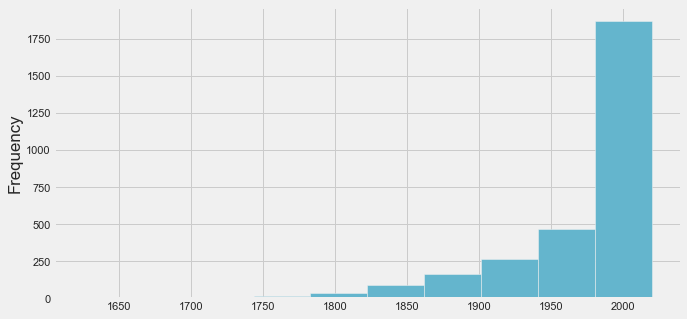

In [45]:
df.Founded.plot.hist(color = 'c')

In [46]:
df['Startup'] = np.where(df.Founded >= 2019., 1, 0)
df['Historic_company'] = np.where(df.Founded < 1950, 1, 0)

##### Type of ownership

In [47]:
print('Percent of missing values in "Type of ownership" feature: ',
round(
    df['Type of ownership'][df['Type of ownership'].isnull() == True].shape[0] / 
    df.shape[0]
        ,2)
     )

Percent of missing values in "Type of ownership" feature:  0.06


In [48]:
df['Type of ownership'].reset_index().groupby('Type of ownership').count().sort_values('index', ascending = False)

,index
Type of ownership,
Company - Private,1933
Company - Public,1110
Nonprofit Organization,207
Subsidiary or Business Segment,160
Government,91
College / University,77
Unknown,38
Contract,17
Hospital,16


In [49]:
df['Company - Private'] = np.where(df['Type of ownership'] == 'Company - Private', 1, 0)

# # Code below higly correlated with "Sector" features
# df['Nonprofit_Edu_Government'] = 0
# for i in ['Nonprofit Organization', 'Government', 'College / University', 'School / School District']:
#     df['Nonprofit_Edu_Government'] = np.where(df['Type of ownership'] == i, 1, df['Nonprofit_Edu_Government'])

##### Revenue
This column has 3676 non-missing values.

Text(0, 0.5, 'Number of companies')

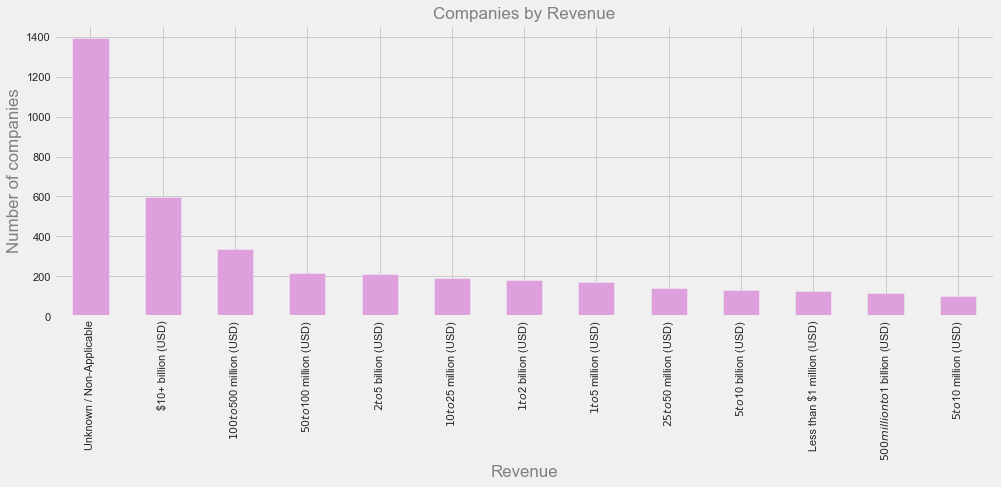

In [50]:
# Revenue
df['Revenue'] = df['Revenue'].replace(np.nan ,"Unknown / Non-Applicable") # merge "-1" into "Unknown..."
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')
df.Revenue.value_counts().plot.bar(color = 'plum')
plt.title("Companies by Revenue", color = 'grey', fontsize = 17)
plt.xlabel("Revenue", color = 'grey')
plt.ylabel("Number of companies", color = 'grey')

In [51]:
for i in range(len(df['Revenue'])):
    
    revenue = df['Revenue'][i].lower()
    
    if 'less than $1 million' in revenue:
        df['Revenue'][i] = 1
    elif 'million' in revenue and ('less than $1 million' not in revenue):
        df['Revenue'][i] = 2
    elif 'billion' in revenue:
        df['Revenue'][i] = 3
    else:
        df['Revenue'][i]= 0  

Text(0, 0.5, 'Number of companies')

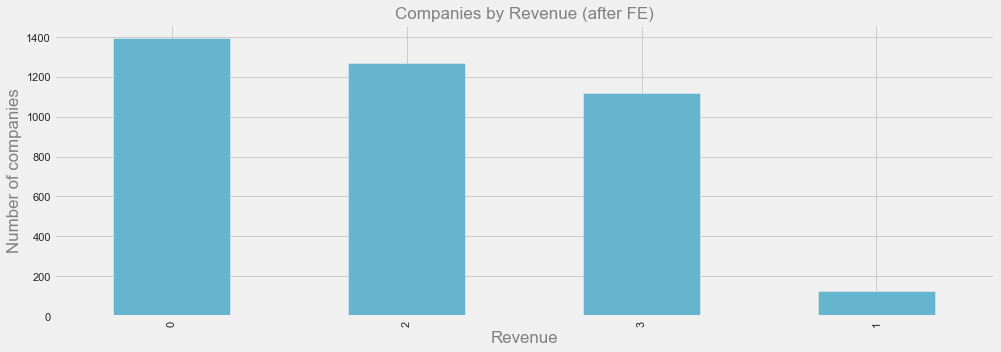

In [52]:
# Revenue
df['Revenue'] = df['Revenue'].replace(np.nan ,"Unknown / Non-Applicable") # merge "-1" into "Unknown..."
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')
df.Revenue.value_counts().plot.bar(color = 'c')
plt.title("Companies by Revenue (after FE)", color = 'grey', fontsize = 17)
plt.xlabel("Revenue", color = 'grey')
plt.ylabel("Number of companies", color = 'grey')

##### Industry and Sector

In [53]:
for sector in ['Travel & Tourism', 'Consumer Services',
       'Information Technology', 'Business Services', 'Insurance',
       'Finance', 'Retail', 'Media', 'Restaurants, Bars & Food Services',
       'Agriculture & Forestry', 'Non-Profit', 'Education', 'Government',
       'Health Care', 'Oil, Gas, Energy & Utilities',
       'Accounting & Legal', 'Manufacturing', 'Real Estate',
       'Biotech & Pharmaceuticals', 'Arts, Entertainment & Recreation',
       'Aerospace & Defense', 'Construction, Repair & Maintenance',
       'Transportation & Logistics', 'Telecommunications',
       'Mining & Metals']:
    df[sector] = np.where(df.Sector == sector, 1, 0)

I used to think that data specialist in healthcare sector will have the highest salary range. But in fact, Media sector suggests the highest mean salaries for data specialist, according to the data.

##### Easy apply

In [54]:
df['Easy Apply'] = np.where(df['Easy Apply'] == True, 1, 0)

In [55]:
for title in df.Title.unique():
    df[title] = np.where(df.Title == title, 1, 0)

In [56]:
for state in df.State.unique():
    df[state] = np.where(df.State == state, 1, 0)

In [57]:
# #BACKUP
# df_before_drop_columns = df

In [58]:
df= df.drop([
        'Job Title',
        'Title',
        'State',
        'Salary Estimate', 
        'Job Description',
        'Company Name', 
        'Location', 
        'Size',
        'Founded', 
        'Competitors',
        'Type of ownership',
        'Industry',
        'Sector',
        'level_0',
        'Unnamed: 0',
        'index',
#        'Revenue',
#        'Rating',
        'City',
        'Headquarters'
        ], axis = 1)

In [59]:
# DataFrame with salary boundaries (for regression)
df_with_salary_boundaries = df.copy()

In [60]:
df_with_salary_boundaries.head()

,Rating,Revenue,Easy Apply,job_in_head_office,salary_estimate_lower_bound,salary_estimate_upper_bound,salary,job_level,Research,python,rstudio,tableau,power bi,powerbi,java,scala,go,bigquery,hive,javascript,c\+\+,julia,hadoop,sql,postgresql,nosql,neural networks,cnn,nlp,saas,matlab,pyspark,tensorflow,pytorch,etl,ms excel,ms powerpoint,powerpoint,spark,google analytics,crm,amazon web services,sas,education_bachelor,education_masters,education_phd,experience,equal_opportunity,501 to 1000 employees,1001 to 5000 employees,1 to 50 employees,201 to 500 employees,...,5001 to 10000 employees,Startup,Historic_company,Company - Private,Travel & Tourism,Consumer Services,Information Technology,Business Services,Insurance,Finance,Retail,Media,"Restaurants, Bars & Food Services",Agriculture & Forestry,Non-Profit,Education,Government,Health Care,"Oil, Gas, Energy & Utilities",Accounting & Legal,Manufacturing,Real Estate,Biotech & Pharmaceuticals,"Arts, Entertainment & Recreation",Aerospace & Defense,"Construction, Repair & Maintenance",Transportation & Logistics,Telecommunications,Mining & Metals,data scientist,data analyst,quantum data scientist,data specialist,data engineer,analytics manager,research scientist,machine learning specialist,bi analyst,data modeler,lab scientist,data architect,big data engineer,NY,NJ,CA,IL,TX,AZ,DE,PA,FL,OH
0,3.0,0,0,0,111.0,181.0,100-200,3,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,5.0,0,0,1,111.0,181.0,100-200,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3.0,0,1,1,111.0,181.0,100-200,5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3.0,0,0,1,111.0,181.0,100-200,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,5,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,3.0,0,0,1,111.0,181.0,100-200,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


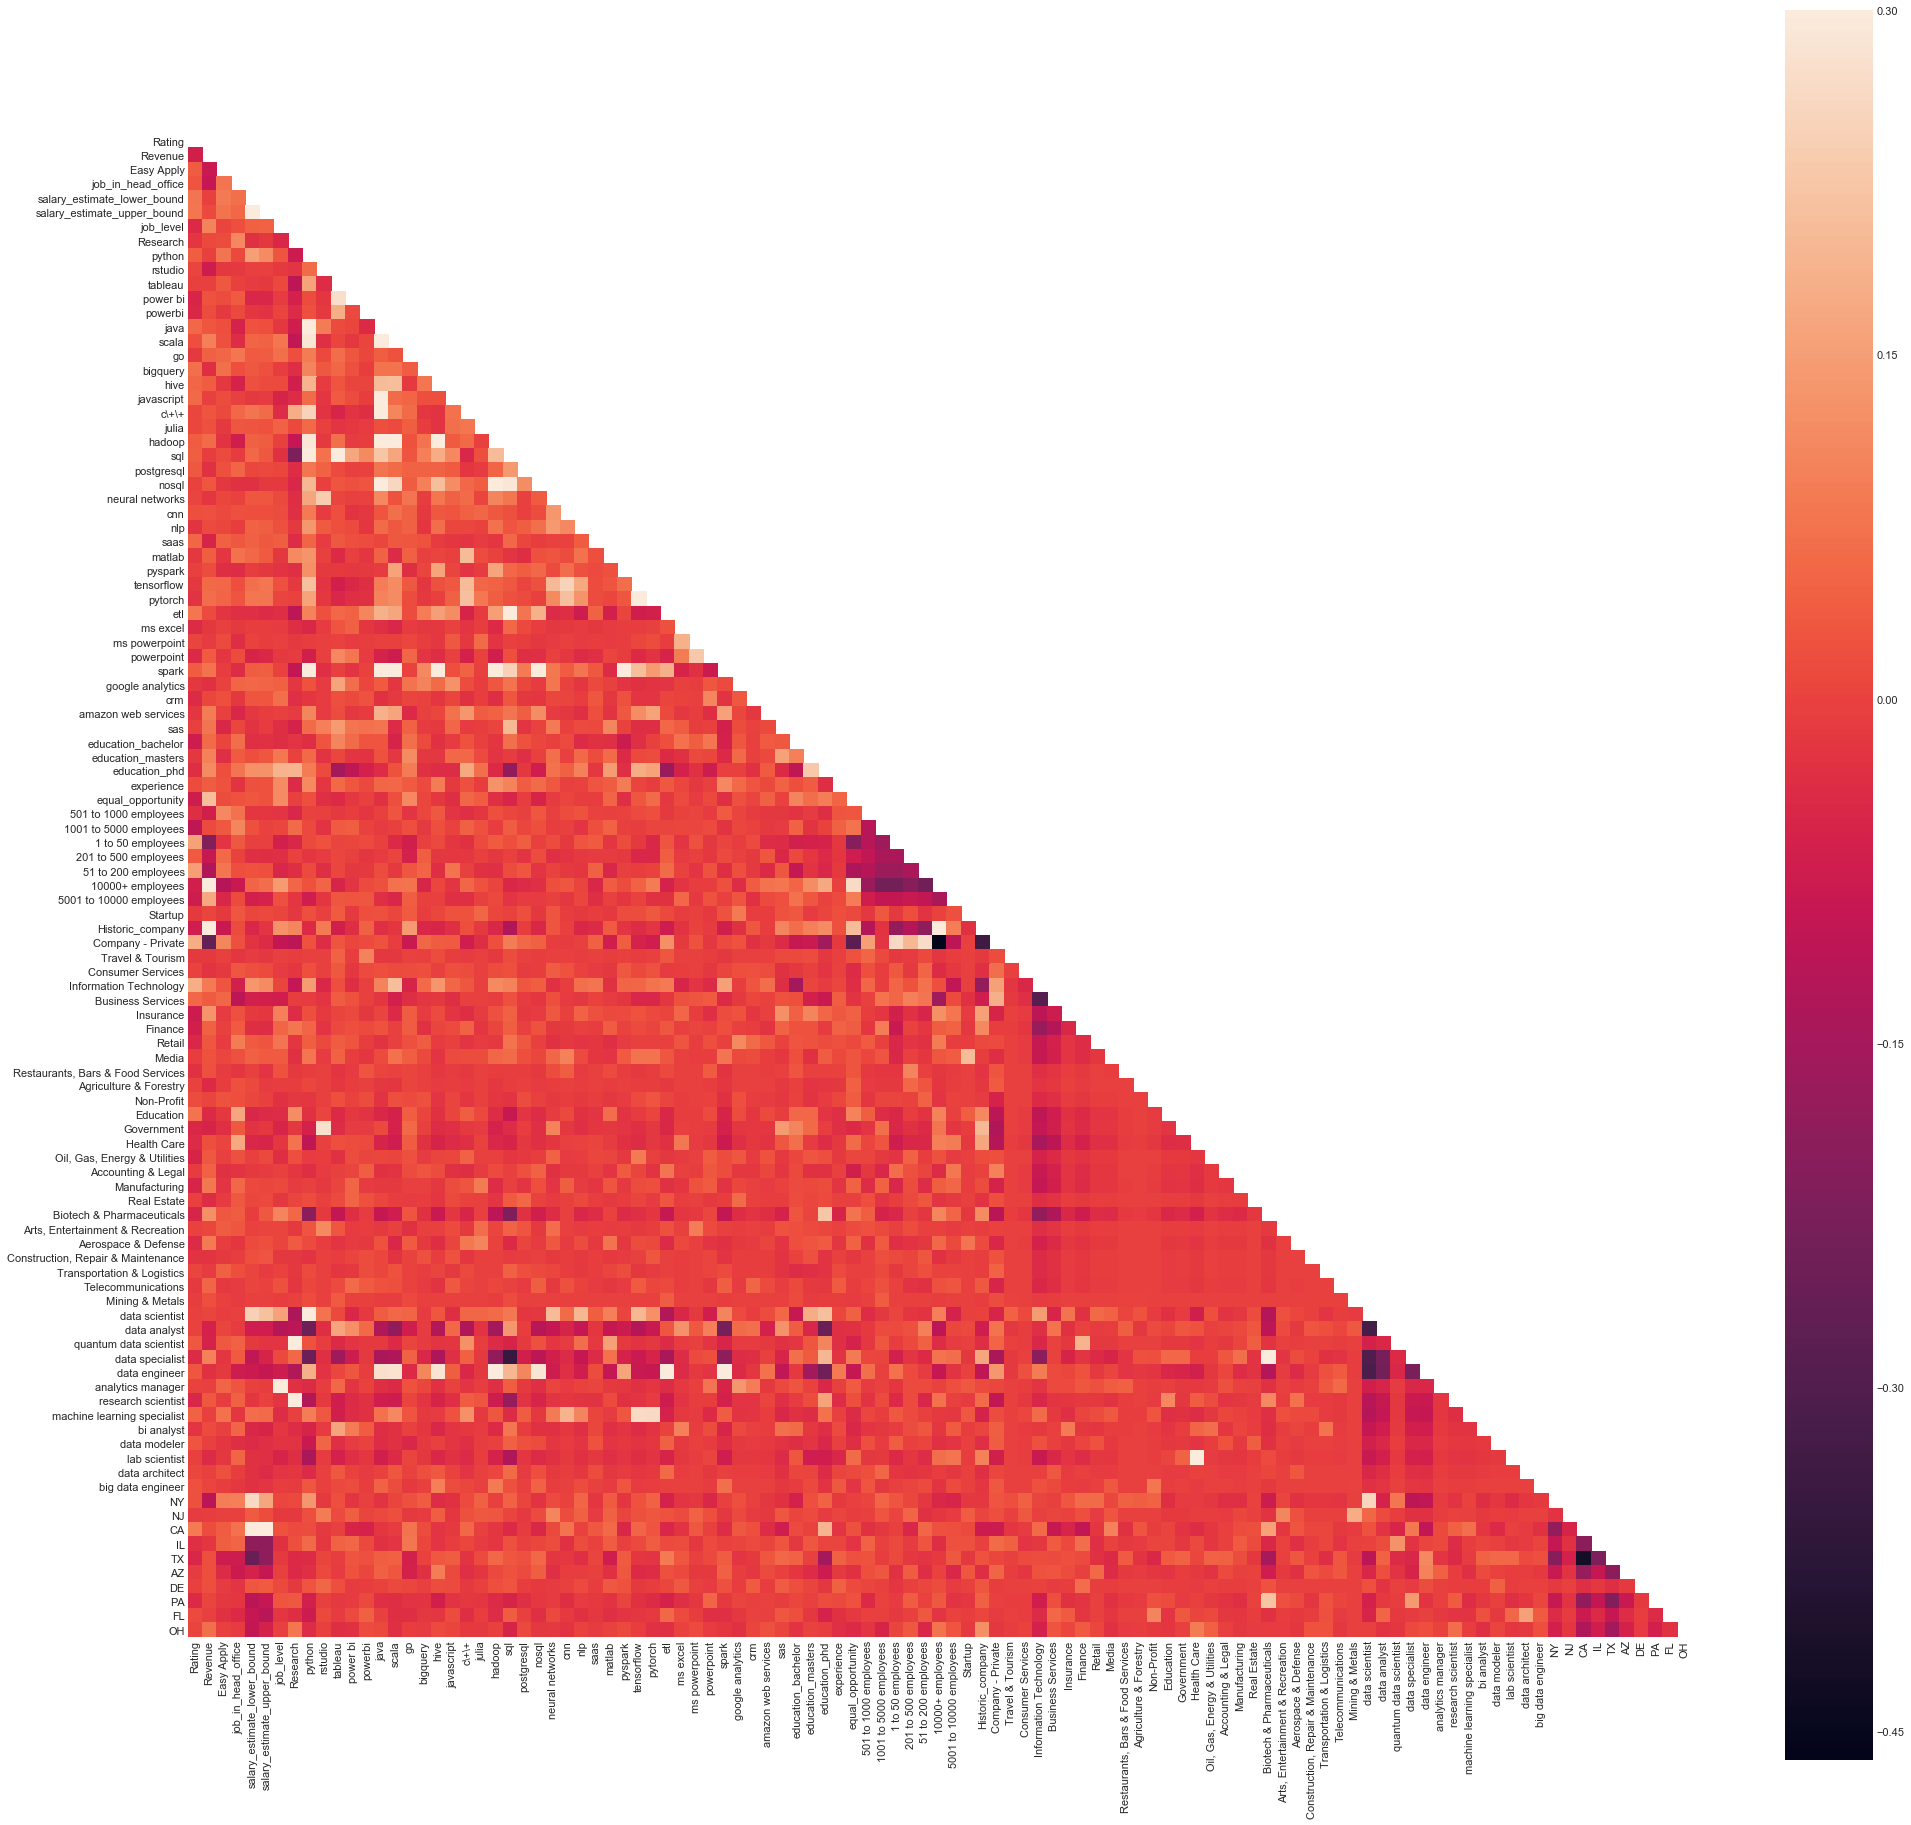

In [61]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30, 30))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

In [62]:
df.drop(['salary_estimate_lower_bound', 'salary_estimate_upper_bound'], axis = 1, inplace = True)

### Machine Learning

In [63]:
from sklearn import metrics  # подгружаем метрики для регрессии

from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix # подгружаем метрики для классификации
from sklearn.model_selection import train_test_split, GridSearchCV

In [64]:
df.salary.unique()

array(['100-200', '75-150', '150-250', '50-100'], dtype=object)

In [65]:
k = 1  
for i in ['50-100', '75-150', '100-200', '150-250']:
    df['salary'] = np.where(df.salary == i, k, df['salary'])
    k += 1

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['salary'], axis = 1), df['salary'].astype('int'), test_size = 0.3, random_state=17)

In [67]:
from sklearn.model_selection import GridSearchCV

# Решетка для перебора параметра 
param_grid = {
    'C': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 1, 2, 3, 5, 10],
    'class_weight': [None, 'balanced']}

# Объявили модель 
model = LogisticRegression(random_state=17) 

# Объявили перебор 
grid_cv = GridSearchCV(model, param_grid, cv = 5)
grid_cv.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_cv.best_params_)

# Сделали прогнозы
y_pred= grid_cv.predict(X_test)

Лучшее значение параметра: {'C': 0.05, 'class_weight': None}


In [68]:
print('\033[1m' + 'Results for Logistic Regression')
print('_'*100)
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('_'*100)
print('                      Classification report:', '\n',
    classification_report(y_test, y_pred))
print('_'*100 + '\033[0m')

Results for Logistic Regression
____________________________________________________________________________________________________
Accuracy score:  0.57
____________________________________________________________________________________________________
                      Classification report: 
               precision    recall  f1-score   support

           1       0.55      0.46      0.50       367
           2       0.54      0.57      0.56       454
           3       0.61      0.72      0.66       328
           4       0.00      0.00      0.00        23

   micro avg       0.57      0.57      0.57      1172
   macro avg       0.43      0.44      0.43      1172
weighted avg       0.55      0.57      0.56      1172

____________________________________________________________________________________________________


In [69]:
parameters = {'n_estimators': [1, 3, 5, 7, 9, 11, 15, 25, 35, 50], 
              'criterion': ['gini', 'entropy'],
              'class_weight': [None, 'balanced'],
              'max_features': [1, 3, 4, 6, 8, 15, 30, 40, 50, 70, 100], 
              'min_samples_leaf': [1, 2, 3, 5, 10, 30, 50], 
              'max_depth': [2, 5, 10, 20, 30, 50, 100], 
                }
rfc = RandomForestClassifier( random_state=42, n_jobs=-1)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, verbose=1)
gcv.fit(X_train, y_train)
y_pred_rf = gcv.predict(X_test)

Fitting 3 folds for each of 21560 candidates, totalling 64680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

In [70]:
print('\033[1m' + 'Results for Random Forest Classifier')
print('_'*100)
print('Accuracy score: ', round(accuracy_score(y_test, y_pred_rf), 2))
print('_'*100)
print('                      Classification report:', '\n',
    classification_report(y_test, y_pred_rf))
print('_'*100 + '\033[0m')

Results for Random Forest Classifier
____________________________________________________________________________________________________
Accuracy score:  0.58
____________________________________________________________________________________________________
                      Classification report: 
               precision    recall  f1-score   support

           1       0.53      0.46      0.49       367
           2       0.54      0.60      0.57       454
           3       0.66      0.71      0.68       328
           4       0.00      0.00      0.00        23

   micro avg       0.58      0.58      0.58      1172
   macro avg       0.43      0.44      0.44      1172
weighted avg       0.56      0.58      0.57      1172

____________________________________________________________________________________________________


In [71]:
# Решетка для перебора параметров 
param_grid = {
    'n_neighbors': range(1,35),    
}

# Объявили модель 
model = KNeighborsClassifier(n_jobs = -1) 

# Объявили перебор 
grid_cv_neig = GridSearchCV(model, param_grid, cv = 5)
grid_cv_neig.fit(X_train, y_train)
print('Лучшая модель:', grid_cv_neig.best_params_)

# Сделали прогнозы
y_pred_neig= grid_cv_neig.predict(X_test)

Лучшая модель: {'n_neighbors': 15}


In [72]:
print('\033[1m' + 'Results for K-neighbors classifier')
print('_'*100)
print('Accuracy score: ', round(accuracy_score(y_test, y_pred_neig), 2))
print('_'*100)
print('                      Classification report:', '\n',
    classification_report(y_test, y_pred_neig))
print('_'*100 + '\033[0m')

Results for K-neighbors classifier
____________________________________________________________________________________________________
Accuracy score:  0.46
____________________________________________________________________________________________________
                      Classification report: 
               precision    recall  f1-score   support

           1       0.43      0.46      0.44       367
           2       0.44      0.52      0.47       454
           3       0.59      0.43      0.50       328
           4       0.00      0.00      0.00        23

   micro avg       0.46      0.46      0.46      1172
   macro avg       0.36      0.35      0.35      1172
weighted avg       0.47      0.46      0.46      1172

____________________________________________________________________________________________________


Давайте посмотрим на самые значимые коэффициенты модели.

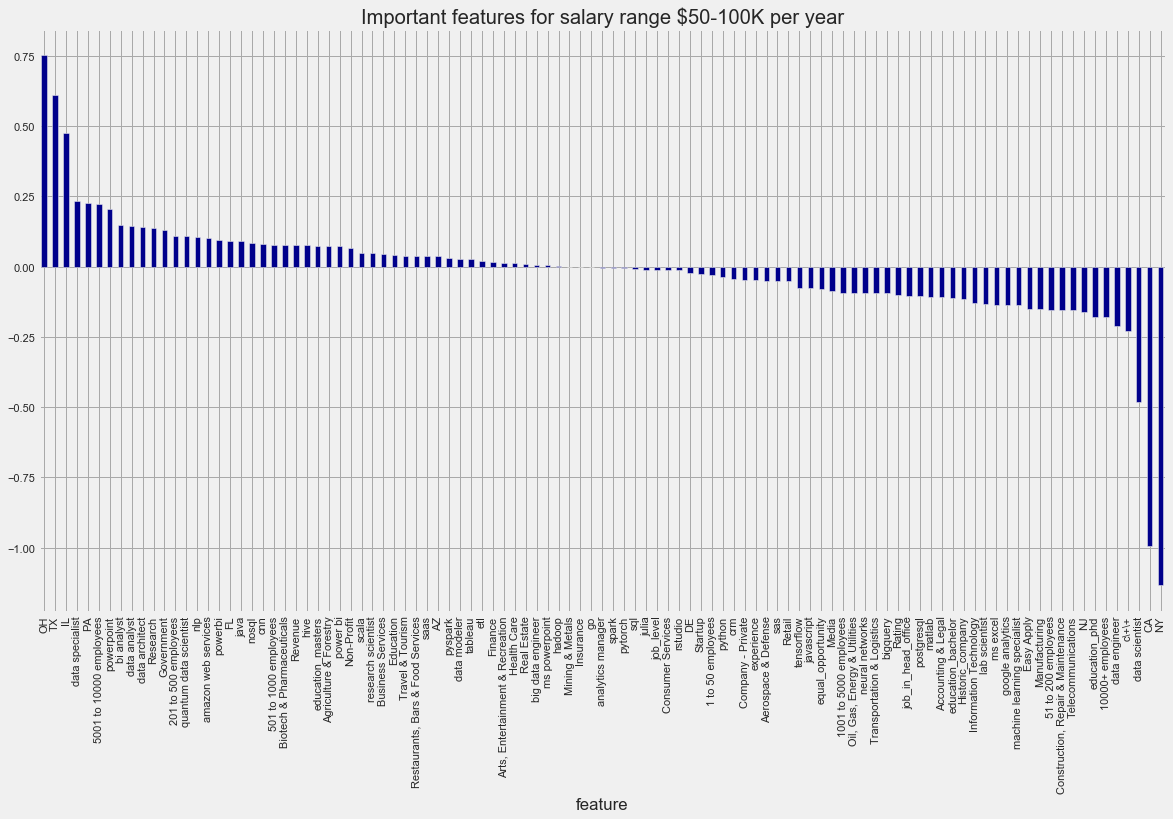

In [73]:
featureImportance = pd.DataFrame({"feature": df.drop(['salary'], axis=1).columns, 
                                  "importance": grid_cv.best_estimator_.coef_[0], })
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(18, 10), color = 'darkblue')
plt.title('Important features for salary range $50-100K per year')
plt.grid(color = 'darkgrey');

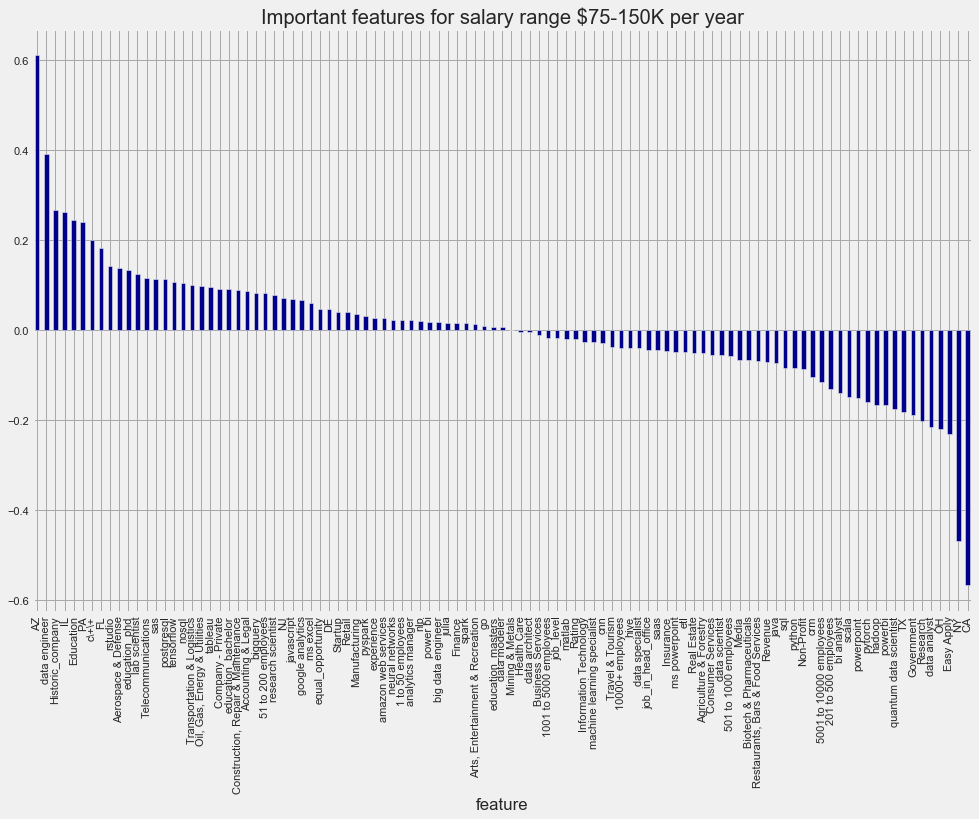

In [74]:
featureImportance = pd.DataFrame({"feature": df.drop(['salary'], axis=1).columns, 
                                  "importance": grid_cv.best_estimator_.coef_[1], })
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(15, 10), color = 'darkblue')
plt.title('Important features for salary range $75-150K per year')
plt.grid(color = 'darkgrey');

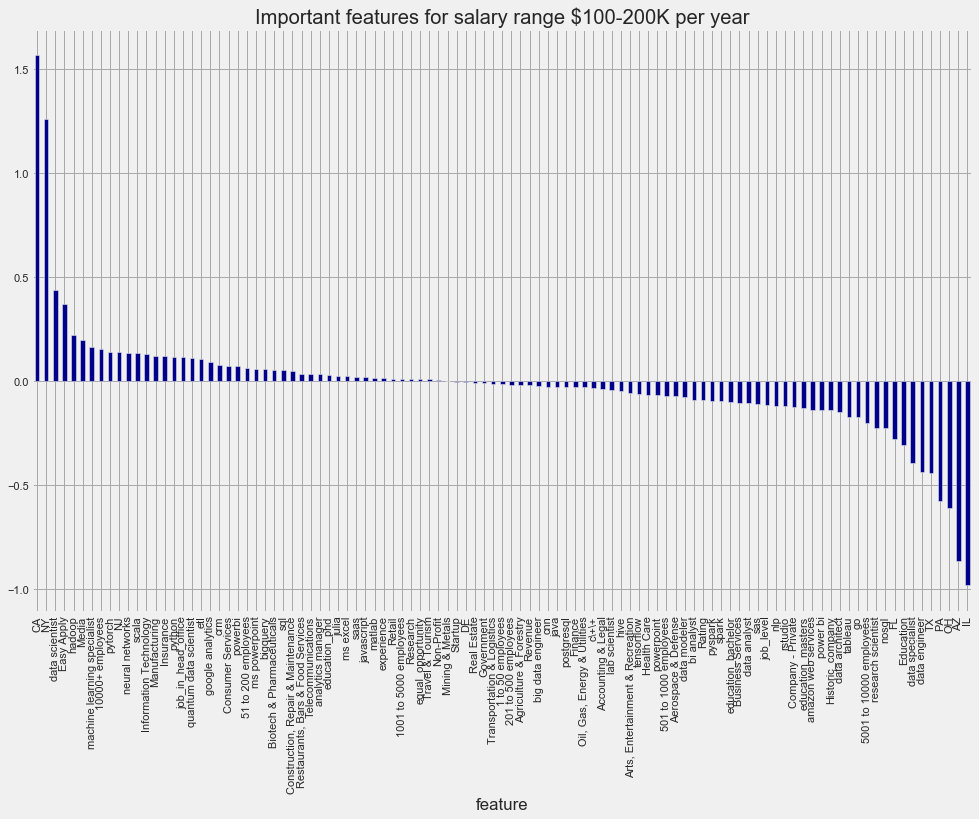

In [75]:
featureImportance = pd.DataFrame({"feature": df.drop(['salary'], axis=1).columns, 
                                  "importance": grid_cv.best_estimator_.coef_[2], })
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(15, 10), color = 'darkblue')
plt.title('Important features for salary range $100-200K per year')
plt.grid(color = 'darkgrey');

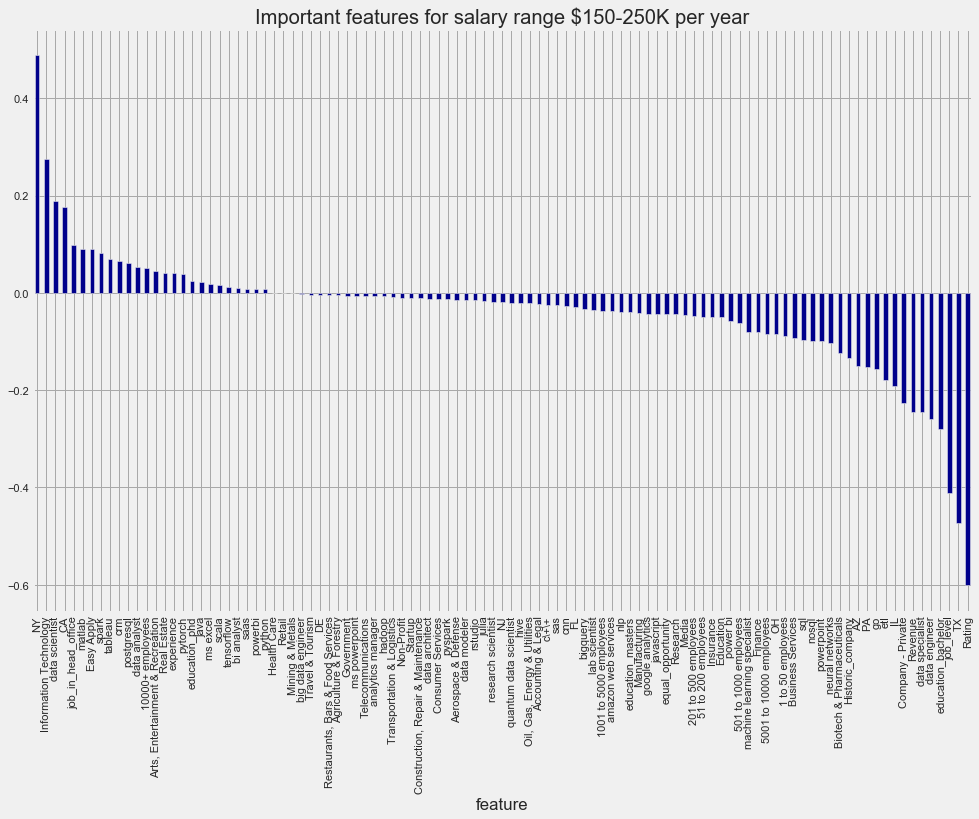

In [76]:
featureImportance = pd.DataFrame({"feature": df.drop(['salary'], axis=1).columns, 
                                  "importance": grid_cv.best_estimator_.coef_[3], })
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(15, 10), color = 'darkblue')
plt.title('Important features for salary range $150-250K per year')
plt.grid(color = 'darkgrey');

##### Посмотрим, возможно ли как-то предсказать границы зарплатного диапазона в рамках регрессионной задачи

Специально для этого в ходе кода я сохранила полностью обработанный датасет ДО удаления из него переменных. 

Он записан здесь: **df_with_salary_boundaries**

In [77]:
data = df_with_salary_boundaries

In [78]:
data.head()

,Rating,Revenue,Easy Apply,job_in_head_office,salary_estimate_lower_bound,salary_estimate_upper_bound,salary,job_level,Research,python,rstudio,tableau,power bi,powerbi,java,scala,go,bigquery,hive,javascript,c\+\+,julia,hadoop,sql,postgresql,nosql,neural networks,cnn,nlp,saas,matlab,pyspark,tensorflow,pytorch,etl,ms excel,ms powerpoint,powerpoint,spark,google analytics,crm,amazon web services,sas,education_bachelor,education_masters,education_phd,experience,equal_opportunity,501 to 1000 employees,1001 to 5000 employees,1 to 50 employees,201 to 500 employees,...,5001 to 10000 employees,Startup,Historic_company,Company - Private,Travel & Tourism,Consumer Services,Information Technology,Business Services,Insurance,Finance,Retail,Media,"Restaurants, Bars & Food Services",Agriculture & Forestry,Non-Profit,Education,Government,Health Care,"Oil, Gas, Energy & Utilities",Accounting & Legal,Manufacturing,Real Estate,Biotech & Pharmaceuticals,"Arts, Entertainment & Recreation",Aerospace & Defense,"Construction, Repair & Maintenance",Transportation & Logistics,Telecommunications,Mining & Metals,data scientist,data analyst,quantum data scientist,data specialist,data engineer,analytics manager,research scientist,machine learning specialist,bi analyst,data modeler,lab scientist,data architect,big data engineer,NY,NJ,CA,IL,TX,AZ,DE,PA,FL,OH
0,3.0,0,0,0,111.0,181.0,100-200,3,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,5.0,0,0,1,111.0,181.0,100-200,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3.0,0,1,1,111.0,181.0,100-200,5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3.0,0,0,1,111.0,181.0,100-200,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,5,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,3.0,0,0,1,111.0,181.0,100-200,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


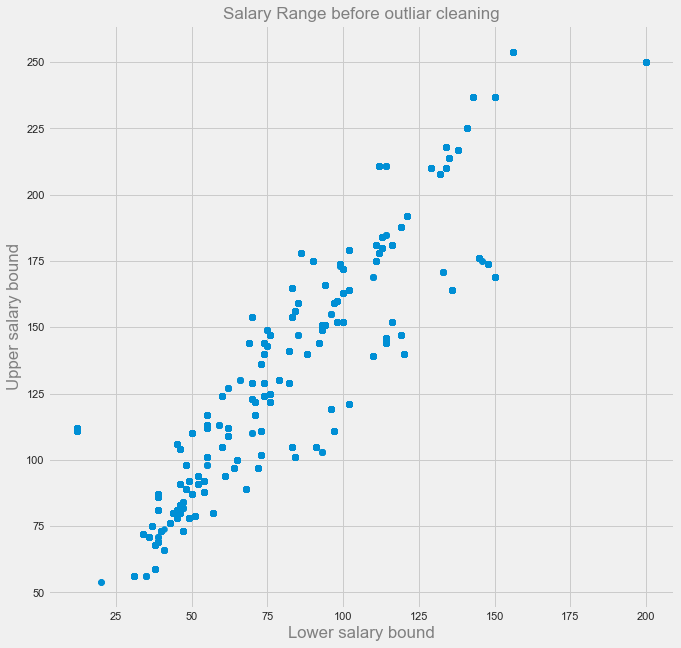

In [79]:
plt.figure(figsize = (10,10))
plt.title("Salary Range before outliar cleaning", color = 'grey', fontsize = 17)
plt.xlabel("Lower salary bound", color = 'grey')
plt.ylabel("Upper salary bound", color = 'grey')
plt.scatter(data.salary_estimate_lower_bound, data.salary_estimate_upper_bound)

In [80]:
IQR_25 = np.percentile(data.salary_estimate_lower_bound, 25)
IQR_75 = np.percentile(data.salary_estimate_lower_bound, 75)
IQR = IQR_75 - IQR_25
numchange_low_lowerbound = 0
numchange_up_lowerbound = 0
data['salary_estimate_lower_bound_clean'] = 0 
for i in range(len(data.salary_estimate_lower_bound)):
    if data.salary_estimate_lower_bound[i] < data.salary_estimate_lower_bound.median() - IQR:
        data.salary_estimate_lower_bound[i] = data.salary_estimate_lower_bound.median() - IQR
        numchange_low_lowerbound += 1
        
    elif data.salary_estimate_lower_bound[i] > data.salary_estimate_lower_bound.median() + IQR:
        data.salary_estimate_lower_bound[i] = data.salary_estimate_lower_bound.median() + IQR
        numchange_up_lowerbound += 1
    else:
        data.salary_estimate_lower_bound[i] = data.salary_estimate_lower_bound[i]
        
print('Percent of changes where salary_estimate_lower_bound is low outliar: ', round(numchange_low_lowerbound/data.shape[0] * 100, 3), '%')
print('Percent of changes where salary_estimate_lower_bound is upper outliar: ', round(numchange_up_lowerbound/data.shape[0] *100, 3), '%')

Percent of changes where salary_estimate_lower_bound is low outliar:  1.562 %
Percent of changes where salary_estimate_lower_bound is upper outliar:  10.166 %


In [81]:
IQR_25 = np.percentile(data.salary_estimate_upper_bound, 25)
IQR_75 = np.percentile(data.salary_estimate_upper_bound, 75)
IQR = IQR_75 - IQR_25

numchange_low_upperbound = 0
numchange_up_upperbound = 0
data['salary_estimate_upper_bound_clean'] = 0 

for i in range(len(data.salary_estimate_upper_bound)):
    
    if data.salary_estimate_upper_bound[i] < data.salary_estimate_upper_bound.median() - IQR:
        data.salary_estimate_upper_bound[i] = data.salary_estimate_upper_bound.median() - IQR
        numchange_low_upperbound +=1
        
    elif data.salary_estimate_upper_bound[i] > data.salary_estimate_upper_bound.median() + IQR:
        data.salary_estimate_upper_bound[i] = data.salary_estimate_upper_bound.median() + IQR
        numchange_up_upperbound += 1
        
    else:
        data.salary_estimate_upper_bound[i] = data.salary_estimate_upper_bound[i]

print('Percent of changes where salary_estimate_upper_bound is low outliar: ', round(numchange_low_upperbound/data.shape[0] *100, 3), '%')
print('Percent of changes where salary_estimate_upper_bound is upper outliar: ', round(numchange_up_upperbound/data.shape[0] *100, 3), '%')

Percent of changes where salary_estimate_upper_bound is low outliar:  1.639 %
Percent of changes where salary_estimate_upper_bound is upper outliar:  9.168 %


In [82]:
# проверка на дурачка
data[data.salary_estimate_lower_bound>=data.salary_estimate_upper_bound]

,Rating,Revenue,Easy Apply,job_in_head_office,salary_estimate_lower_bound,salary_estimate_upper_bound,salary,job_level,Research,python,rstudio,tableau,power bi,powerbi,java,scala,go,bigquery,hive,javascript,c\+\+,julia,hadoop,sql,postgresql,nosql,neural networks,cnn,nlp,saas,matlab,pyspark,tensorflow,pytorch,etl,ms excel,ms powerpoint,powerpoint,spark,google analytics,crm,amazon web services,sas,education_bachelor,education_masters,education_phd,experience,equal_opportunity,501 to 1000 employees,1001 to 5000 employees,1 to 50 employees,201 to 500 employees,...,Historic_company,Company - Private,Travel & Tourism,Consumer Services,Information Technology,Business Services,Insurance,Finance,Retail,Media,"Restaurants, Bars & Food Services",Agriculture & Forestry,Non-Profit,Education,Government,Health Care,"Oil, Gas, Energy & Utilities",Accounting & Legal,Manufacturing,Real Estate,Biotech & Pharmaceuticals,"Arts, Entertainment & Recreation",Aerospace & Defense,"Construction, Repair & Maintenance",Transportation & Logistics,Telecommunications,Mining & Metals,data scientist,data analyst,quantum data scientist,data specialist,data engineer,analytics manager,research scientist,machine learning specialist,bi analyst,data modeler,lab scientist,data architect,big data engineer,NY,NJ,CA,IL,TX,AZ,DE,PA,FL,OH,salary_estimate_lower_bound_clean,salary_estimate_upper_bound_clean


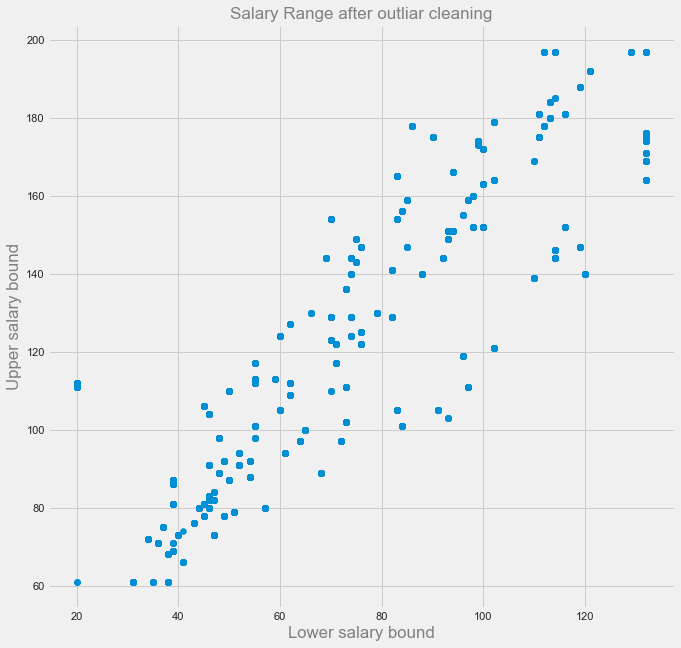

In [83]:
plt.figure(figsize = (10,10))
plt.title("Salary Range after outliar cleaning", color = 'grey', fontsize = 17)
plt.xlabel("Lower salary bound", color = 'grey')
plt.ylabel("Upper salary bound", color = 'grey')
plt.scatter(data.salary_estimate_lower_bound, data.salary_estimate_upper_bound)

Попробуем также создать переменную средней заработной платы. И для неё также обучить модель.

In [84]:
data['salary_mean'] = (data['salary_estimate_lower_bound'] + data['salary_estimate_upper_bound'])/2
#data.drop(['salary_estimate_lower_bound', 'salary_estimate_upper_bound'], axis = 1, inplace = True)

In [85]:
IQR_25 = np.percentile(data.salary_mean, 25)
IQR_75 = np.percentile(data.salary_mean, 75)
IQR = IQR_75 - IQR_25
numchange_low_salary_mean = 0
numchange_up_salary_mean = 0

for i in range(len(data.salary_mean)):
    
    if data.salary_mean[i] < data.salary_mean.median() - 1.25*IQR:
        data.salary_mean[i] = data.salary_mean.median()
        numchange_low_salary_mean += 1
    elif data.salary_mean[i] > data.salary_mean.median() + 1.25*IQR:
        data.salary_mean[i] = data.salary_mean.median()
        numchange_up_salary_mean += 1
    else:
        data.salary_mean[i] = data.salary_mean[i]

print('Percent of changes where salary_estimate_upper_bound is low outliar: ', round(numchange_low_salary_mean/data.shape[0] *100, 3), '%')
print('Percent of changes where salary_estimate_upper_bound is upper outliar: ', round(numchange_up_salary_mean/data.shape[0] *100, 3), '%')

Percent of changes where salary_estimate_upper_bound is low outliar:  0.0 %
Percent of changes where salary_estimate_upper_bound is upper outliar:  0.0 %


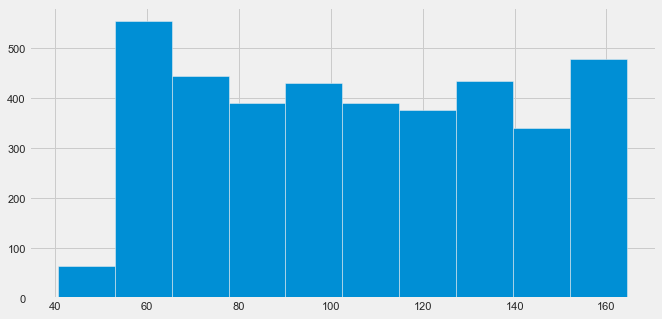

In [86]:
data.salary_mean.hist()

In [100]:
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(data.drop(['salary_estimate_lower_bound', 'salary_estimate_upper_bound', 'salary', 'salary_mean'], 
                                                           axis = 1), 
                                                                    data['salary_estimate_lower_bound'], 
                                                                    test_size = 0.25, random_state=17 )

X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(data.drop(['salary_estimate_lower_bound', 'salary_estimate_upper_bound', 'salary', 'salary_mean'], 
                                                           axis = 1), 
                                                                data['salary_estimate_upper_bound'], 
                                                                test_size = 0.25, random_state=17)

# X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(data.drop(['salary_estimate_lower_bound', 'salary_estimate_upper_bound', 'salary', 'salary_mean'], 
#                                                            axis = 1), 
#                                                                 data['salary_mean'], 
#                                                                 test_size = 0.25, random_state=17)

In [101]:
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    pass

In [102]:
# Решетка для перебора параметра 
param_grid = {
    'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 1, 5, 10]}

# Объявили модель 
model_lasso = Lasso(random_state=17, normalize = True) 

# Объявили перебор 
grid_cv_lasso_low = GridSearchCV(model_lasso, param_grid, cv = 10)
grid_cv_lasso_low.fit(X_train_low, y_train_low)
print('Лучшее значение параметра:', grid_cv_lasso_low.best_params_)

# Сделали прогнозы
y_pred_lasso_low = grid_cv_lasso_low.predict(X_test_low)
print_metrics(y_test_low, y_pred_lasso_low)

Лучшее значение параметра: {'alpha': 0.01}
MAE: 21.975942931527655
RMSE: 26.344568220663216
R2: 0.3014177889620542


In [103]:
# Решетка для перебора параметра 
param_grid = {
    'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 1, 5, 10]}

# Объявили модель 
model_lasso = Ridge(random_state=17, normalize = True) 

# Объявили перебор 
grid_cv_ridge_low = GridSearchCV(model_lasso, param_grid, cv = 10)
grid_cv_ridge_low.fit(X_train_low, y_train_low)
print('Лучшее значение параметра:', grid_cv_ridge_low.best_params_)

# Сделали прогнозы
y_pred_ridge_low = grid_cv_ridge_low.predict(X_test_low)
print_metrics(y_test_low, y_pred_ridge_low)

Лучшее значение параметра: {'alpha': 0.1}
MAE: 21.802882661262363
RMSE: 26.333248415745324
R2: 0.30201799735084756


In [104]:
# Объявили модель 
model_lasso = Lasso(random_state=17, normalize = True) 

# Объявили перебор 
grid_cv_lasso_up = GridSearchCV(model_lasso, param_grid, cv = 5)
grid_cv_lasso_up.fit(X_train_up, y_train_up)
print('Лучшее значение параметра:', grid_cv_lasso_up.best_params_)

# Сделали прогнозы
y_pred_lasso_up = grid_cv_lasso_up.predict(X_test_up)
print_metrics(y_test_up , y_pred_lasso_up )

Лучшее значение параметра: {'alpha': 0.01}
MAE: 29.466361624735068
RMSE: 35.35234751982749
R2: 0.22691587728953444


In [105]:
# Решетка для перебора параметра 
param_grid = {
    'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 1, 5, 10]}

# Объявили модель 
model_lasso = Ridge(random_state=17, normalize = True) 

# Объявили перебор 
grid_cv_ridge_up = GridSearchCV(model_lasso, param_grid, cv = 10)
grid_cv_ridge_up.fit(X_train_up, y_train_up)
print('Лучшее значение параметра:', grid_cv_ridge_up.best_params_)

# Сделали прогнозы
y_pred_ridge_up = grid_cv_ridge_up.predict(X_test_up)
print_metrics(y_test_up, y_pred_ridge_up)

Лучшее значение параметра: {'alpha': 0.2}
MAE: 29.701808823241883
RMSE: 35.52715493869418
R2: 0.2192516079387714


In [106]:
y_pred_low_noindex = pd.DataFrame(y_pred_lasso_low, columns=['y_pred_low'])
y_pred_up_noindex = pd.DataFrame(y_pred_lasso_up, columns=['y_pred_up'])

In [111]:
#pd.concat([X_test.reset_index(), pd.DataFrame(y_test).reset_index(), pd.DataFrame(y_pred_lasso1)], axis = 1)

validation = pd.concat([y_test_low.reset_index().drop('index', axis = 1), 
          y_test_up.reset_index().drop('index', axis = 1),
          y_pred_low_noindex, 
          y_pred_up_noindex], axis = 1)
validation.head()

,salary_estimate_lower_bound,salary_estimate_upper_bound,y_pred_low,y_pred_up
0,98.0,160.0,78.362529,132.638361
1,54.0,92.0,73.432834,126.093724
2,39.0,86.0,64.277556,110.496435
3,121.0,192.0,106.514391,170.934679
4,38.0,68.0,67.981899,121.990225


In [130]:
validation['error'] = 0.0

for i in range(validation.shape[0]):
    a = validation['salary_estimate_lower_bound'][i]
    b = validation['salary_estimate_upper_bound'][i]
    c = validation['y_pred_low'][i]
    d = validation['y_pred_up'][i]
    if c>=a and d<=b:
        validation['error'][i] = 1 - (d-c)/(b-a)
    elif c<=a and d<=b:
        validation['error'][i] = 1 - (d-a)/(b-c)
    elif c>=a and d>=b:
        validation['error'][i] = 1 - (b-c)/(d-a)
    else: 
        #c<=a and d>=b:
        validation['error'][i] = 1 - (b-a)/(d-c)      

In [131]:
validation.head()

,salary_estimate_lower_bound,salary_estimate_upper_bound,y_pred_low,y_pred_up,error
0,98.0,160.0,78.362529,132.638361,0.575705
1,54.0,92.0,73.432834,126.093724,0.742458
2,39.0,86.0,64.277556,110.496435,0.696174
3,121.0,192.0,106.514391,170.934679,0.415870
4,38.0,68.0,67.981899,121.990225,0.999784


In [132]:
validation.error.mean()

0.6268980117643648

Получается, что в среднем мы правильно угадываем только ~48% от диапазона заработной платы. Подойти в задаче предсказания диапазона заработной платы как к задаче регрессии не представляется возможным. Тем не менее, попробуем посмотреть какие переменные были наиболее важными для данных моделей.

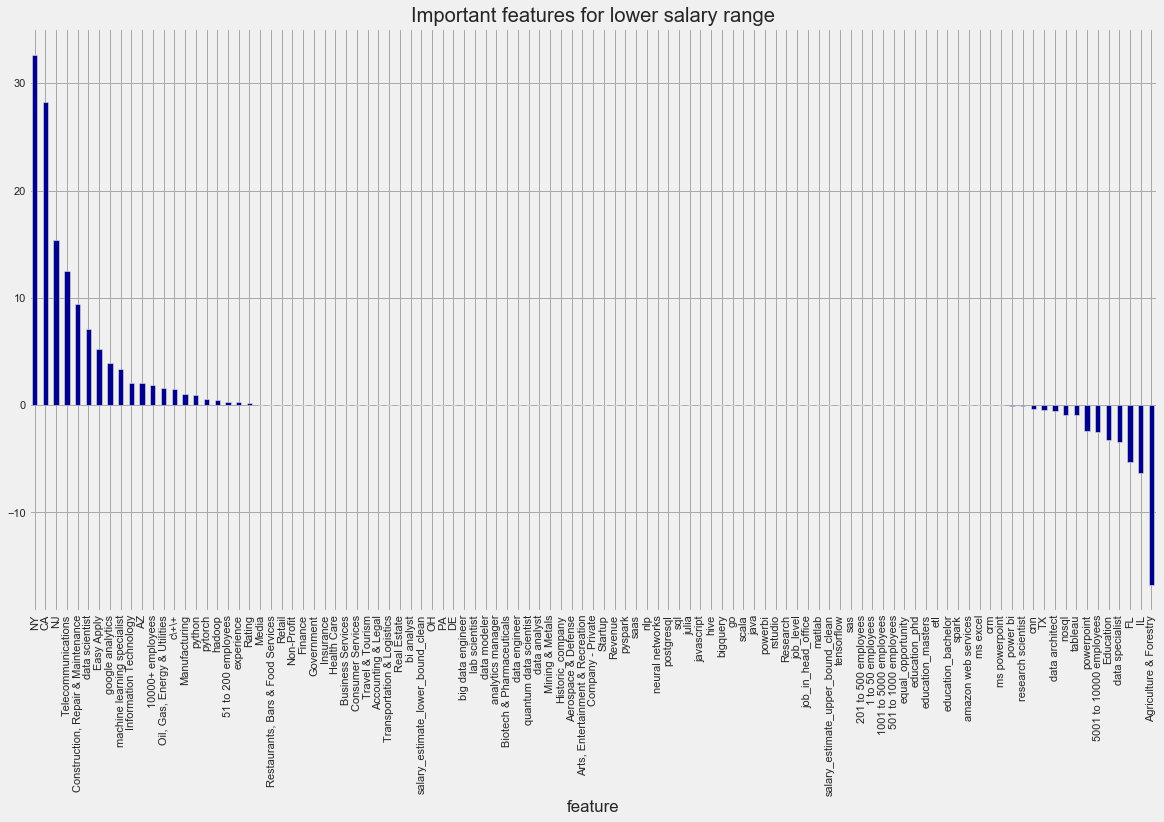

In [133]:
featureImportance = pd.DataFrame({"feature": data.drop(['salary_estimate_lower_bound', 
                                                        'salary_estimate_upper_bound', 
                                                        'salary', 
                                                        'salary_mean'], axis = 1).columns, 
                                  "importance": grid_cv_lasso_low.best_estimator_.coef_, })
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(18, 10), color = 'darkblue')
plt.title('Important features for lower salary range')
plt.grid(color = 'darkgrey');

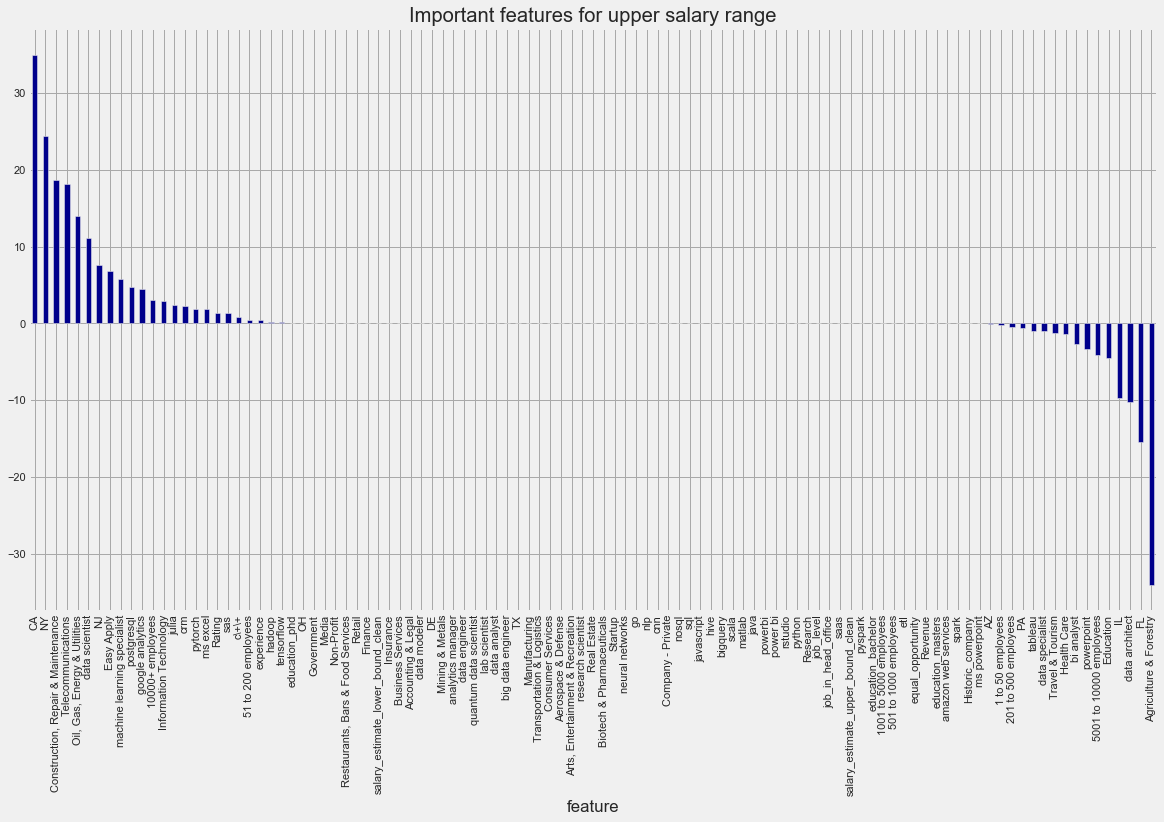

In [134]:
featureImportance = pd.DataFrame({"feature": data.drop(['salary_estimate_lower_bound', 
                                                        'salary_estimate_upper_bound', 
                                                        'salary', 
                                                        'salary_mean'], axis = 1).columns, 
                                  "importance": grid_cv_lasso_up.best_estimator_.coef_, })
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(18, 10), color = 'darkblue')
plt.title('Important features for upper salary range')
plt.grid(color = 'darkgrey');